In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('presentation')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

green = '#228833'
purple = '#AA3377'
cyan = '#66CCEE'
red = '#EE6677'
yellow = '#CCBB44'
blue = '#4477AA'
# Not from the color palette
grey = '#444444'
denSize = 18
folder = 'AAC-2018/'

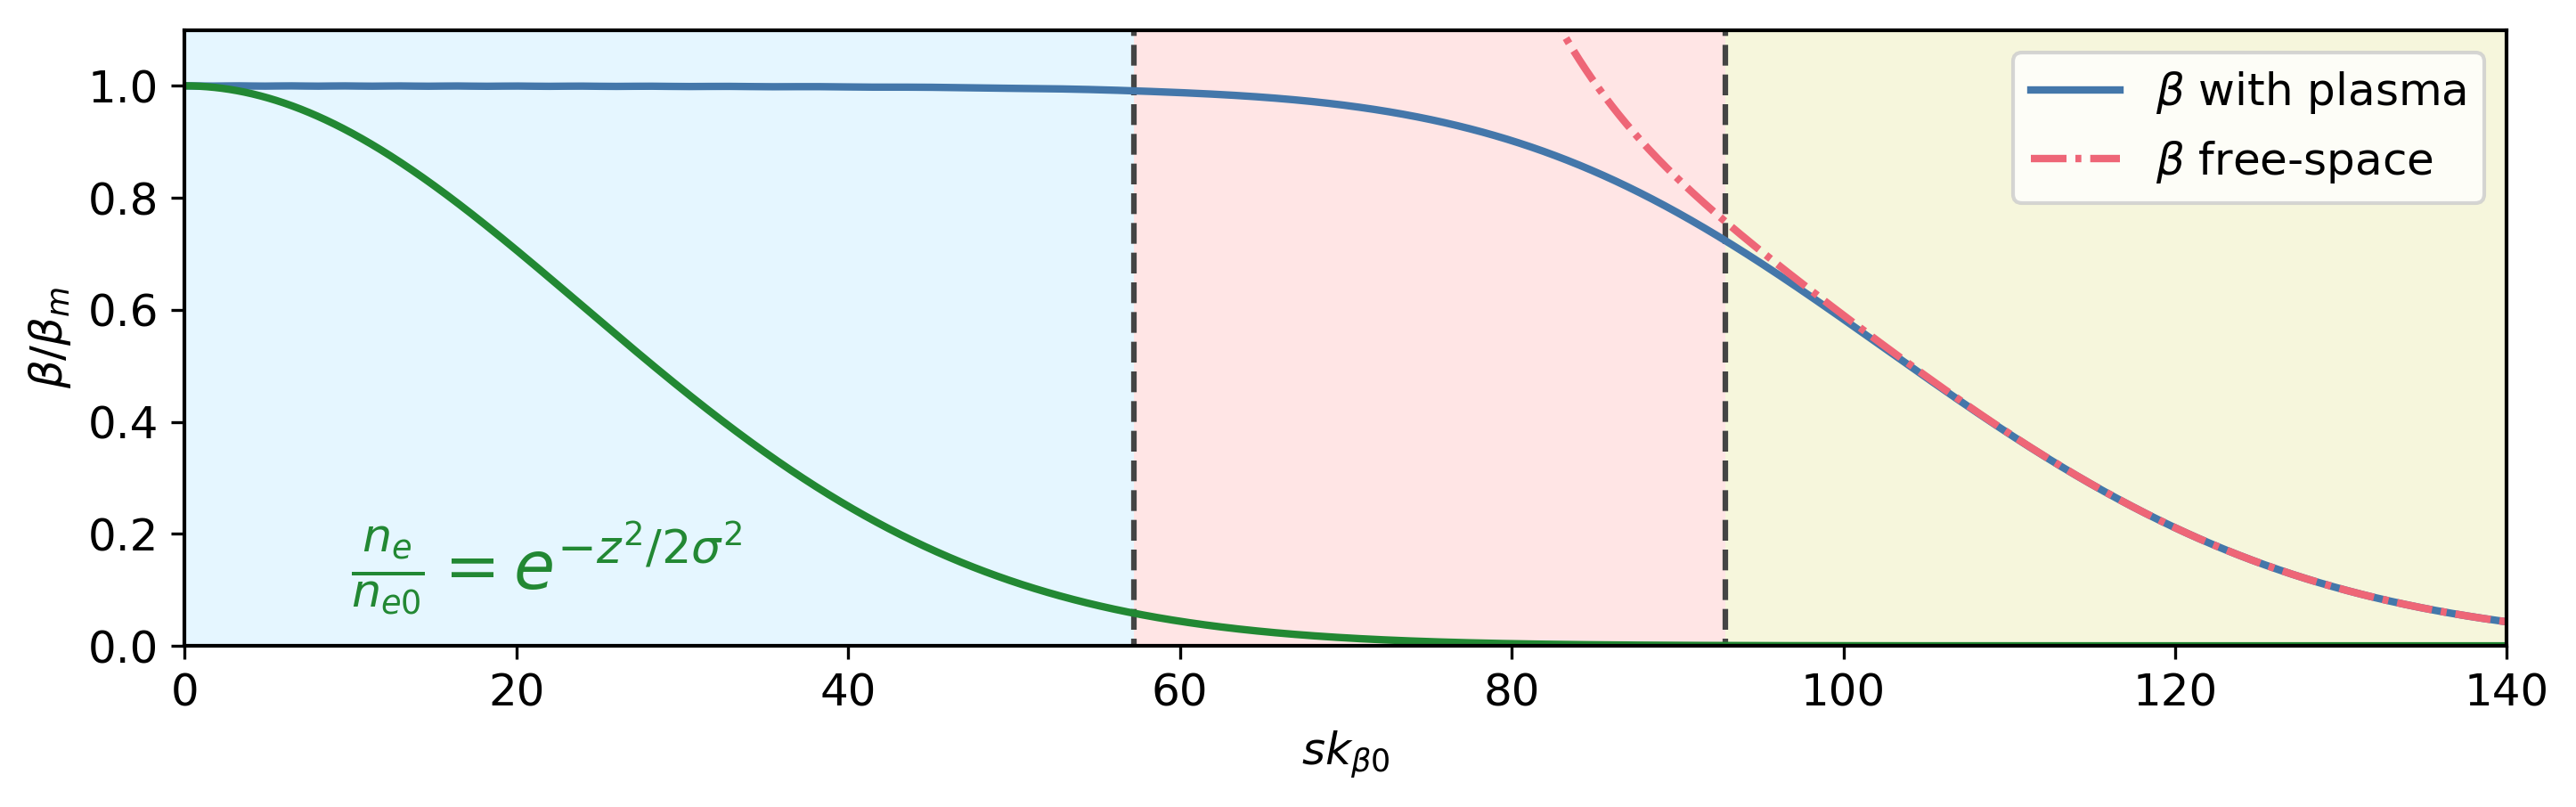

In [2]:
N = 10000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z = np.linspace(0, 250, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

tran = 0.85
# Transition to perturbed propagation
tran1 = z[-np.array(alpha)<=tran][-1]

tran = 0.1
# Transition from adiabatic propagation
tran2 = z[-np.array(alpha)<=tran][-1]

# Calculate the free space propagation
bs = 1/gamma[-1]
ss = alpha[-1]*bs + 250
betaFree = (z-ss)**2/bs+bs

# Plotting
#------------------------------------------------------------------------------------
mult = np.sqrt(frac)
#mult2 = np.sqrt(fracTran)
#mult = 1
#mult2 = 1

plt.figure(figsize=(9.8, 3.18), dpi=300)

# Plot beam evolution 
plt.plot(z, np.array(beta)*mult)
plt.plot(z, betaFree*mult, '-.')
#plt.plot(z, 1/np.sqrt(frac), 'b--')
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\beta/\beta_m$')
plt.legend([r'$\beta$ with plasma', r'$\beta$ free-space', r'Transition'], loc=1)
plt.ylim(0.0, 1.1)
#plt.yscale('log')

# Plot transition points
plt.plot([tran1, tran1], [-1, 1e4], 'k--', c=grey, zorder=1, linewidth=1.5)
plt.plot([tran2, tran2], [-1, 1e4], 'k--', c=grey, zorder=1, linewidth=1.5)

# Regions of the plot
plt.axvspan(0,  tran2, facecolor='#CCEEFF', alpha=0.5, zorder=0)
plt.axvspan(tran2,  tran1, facecolor='#FFCCCC', alpha=0.5, zorder=0)
plt.axvspan(tran1,  140, facecolor='#EEEEBB', alpha=0.5, zorder=0)

# Plot plasma density
#plt.twinx()
plt.plot(z, frac)
plt.text(10, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2\sigma^2}$', color=green, fontsize=denSize)
#plt.ylim(0.0, 1.1)
plt.xlim(0, 140)
#plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
#plt.yscale('log')
plt.tight_layout()
plt.savefig(folder+'Gaussian_Beam_Evolution.svg')
plt.show()

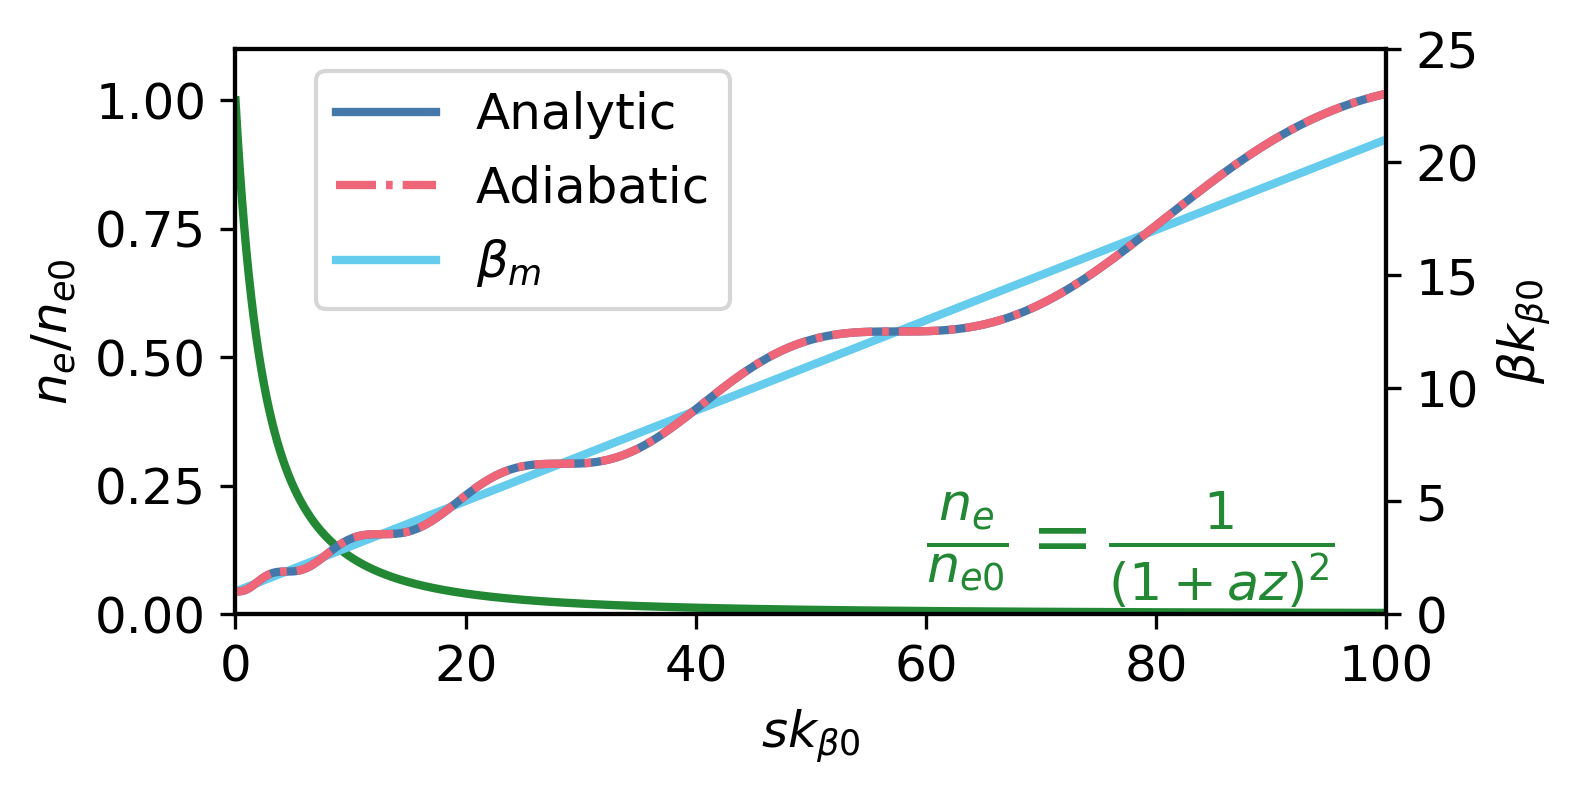

In [3]:
# Possible incoming beams for an adiabatic focuser
N = 5000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.2
z = np.linspace(0, 100, N)
frac = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

Delta = a/(a-2)

plt.figure(figsize=(5.33, 2.81), dpi=300)
plt.plot(z, frac, c=green)
plt.text(60, 0.1, r'$\frac{n_e}{n_{e0}}=\frac{1}{(1+az)^2}$', color=green, fontsize=denSize)
plt.ylim(0, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlabel(r'$s k_{\beta0}$')
plt.twinx()
plt.plot(z, beta)
plt.plot(z, (1+a*z)*(1+1/(4/a**2-1)-1/(4/a**2-1)*np.cos(np.log(1+a*z)*np.sqrt(4/a**2-1))
                     -1/np.sqrt(4/a**2-1)*np.sin(np.log(1+a*z)*np.sqrt(4/a**2-1))), '-.')
plt.plot(z, 1/np.sqrt(frac), c=cyan, zorder=1)
plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'Analytic', r'Adiabatic', r'$\beta_m$'], bbox_to_anchor=(.25, .75), loc='center')
plt.ylim(0, 25)
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig(folder+'Adiabatic_Evolution.svg')
plt.show()

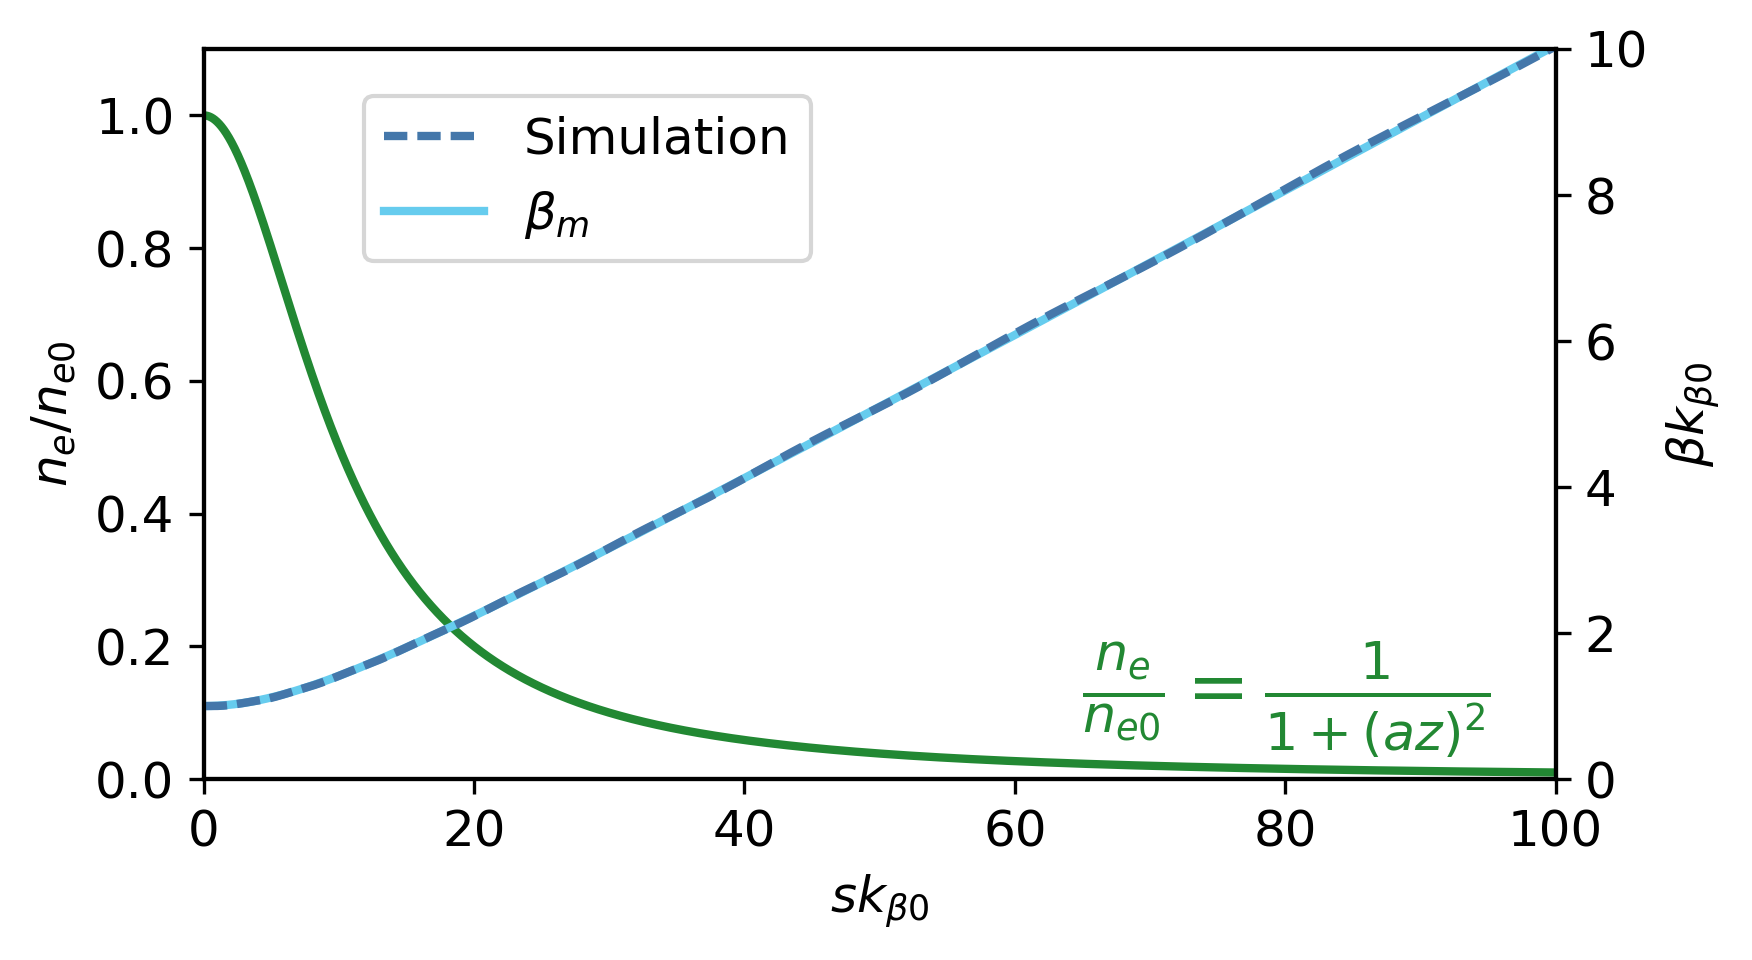

In [4]:
N = 5000
beta0 = 1.0
alpha0 = 0.0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.1
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
frac2 = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

plt.figure(figsize=(6, 3.36), dpi=300)
plt.plot(z, frac, c=green)
plt.text(65, 0.1, r'$\frac{n_e}{n_{e0}}=\frac{1}{1+(az)^2}$', color=green, fontsize=denSize)
plt.ylim(0, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlabel(r'$s k_{\beta0}$')
plt.twinx()
plt.plot(z, beta, '--')
#plt.plot(z, analytic, 'b--')
plt.plot(z, 1/np.sqrt(frac), c=cyan, zorder=1)
plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'Simulation', r'$\beta_m$'], bbox_to_anchor=(.1, 1.02, 1., -.05))
plt.ylim(0, 10)
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig(folder+'Smooth_Adiabatic_Evolution.svg')
plt.show()

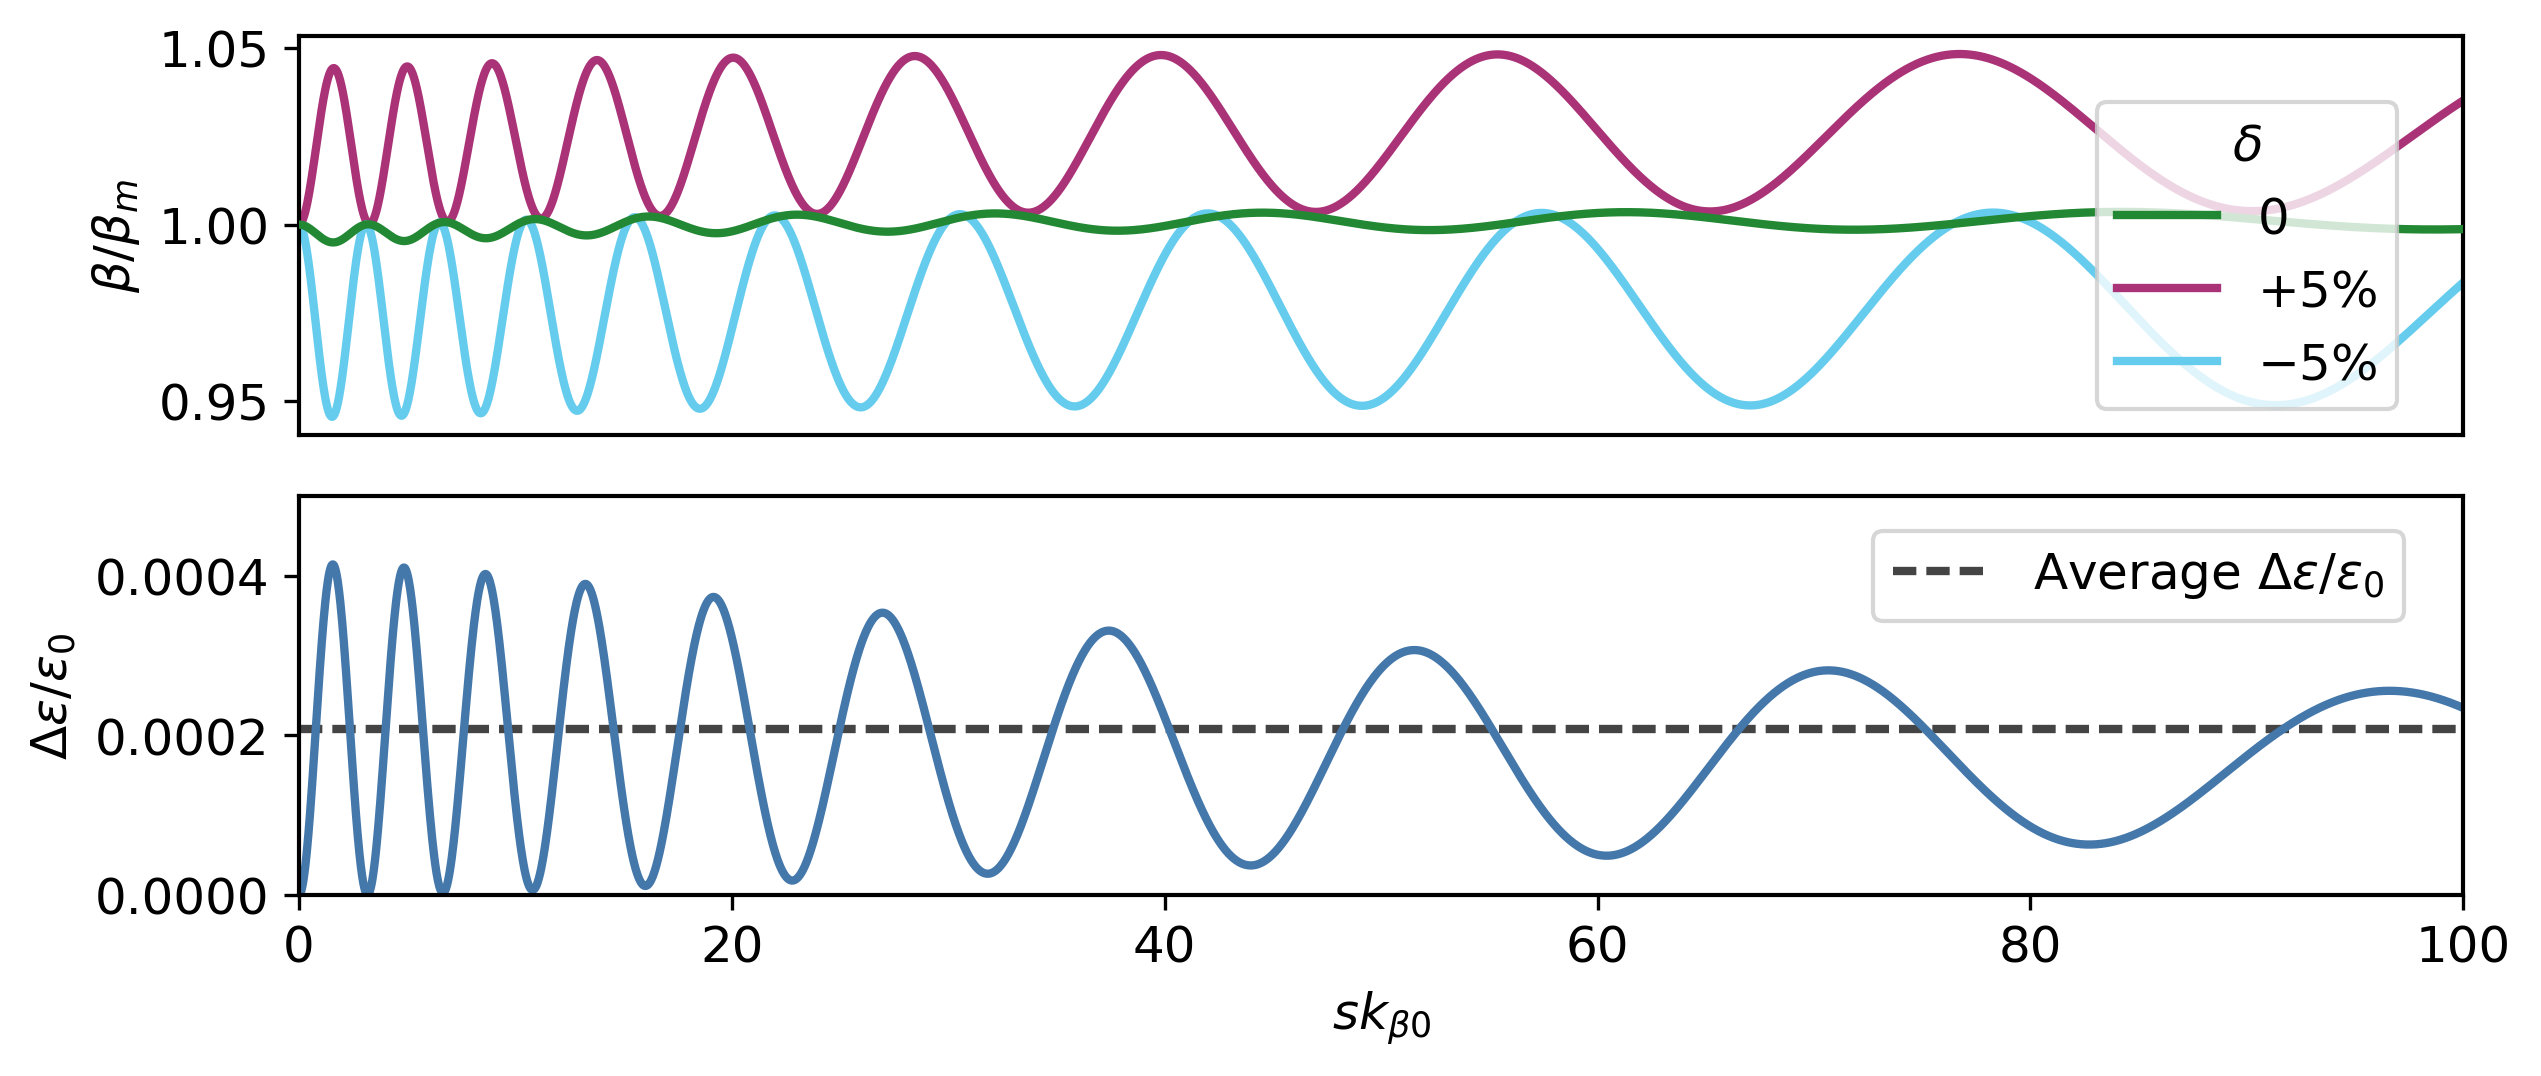

In [5]:
# The complicated emittance growth and chromatic beam evolution plot
N = 5000
beta0 = 1.0
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.1
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*1.05, dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*0.95, dgdz0, ne0)

betam = 1/np.sqrt(frac)
#betam = 1

# Calculate the emittance growth
M = 500
delta = np.linspace(-0.05, 0.05, M)
gb0A = 20000*(1+delta)
betaDelta = np.zeros((M, N), dtype='double')
alphaDelta = np.zeros((M, N), dtype='double')
gammaDelta = np.zeros((M, N), dtype='double')
for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0, alpha0, gb0A[i],
                                                                                  dgdz0, ne0)
    
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)
eps = np.sqrt(betaP*gammaP-alphaP**2)
avgeps = np.average(eps)

epsA = 0.05**2/12

# Plotting
#------------------------------------------------------------------------------------
plt.figure(figsize=(8.63, 3.75), dpi=300)
gs = gridspec.GridSpec(2, 1)

# Plot of the beam evolution
ax = plt.subplot(gs[0, 0])
plt.plot(z, np.array(beta)/betam, c=green, zorder=3)
plt.plot(z, np.array(beta1)/betam, c=purple)
plt.plot(z, np.array(betan1)/betam, c=cyan)
plt.plot()
ax.get_xaxis().set_visible(False)
plt.ylabel(r'$\beta/\beta_m$')
plt.legend([r'$0$', r'$+5\%$', r'$-5\%$'], title=r'$\delta$',
           bbox_to_anchor=(0.9, 0.45), loc='center')
plt.xlim(0,100)

# Plot of the emittance growth
plt.subplot(gs[1, 0])
plt.plot(z, eps-1, label='_nolegend_')
plt.plot([0, 100], [epsA, epsA], 'k--', c=grey, zorder=1, label=r'Average $\Delta\epsilon/\epsilon_0$')
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\Delta\epsilon/\epsilon_0$')
plt.legend(bbox_to_anchor=(0.85, 0.8), loc='center')
plt.xlim(0, 100)
plt.ylim(0, 0.0005)

#plt.text(60, 0.0003, r'Average emittance growth', color=grey, fontsize=denSize)

plt.tight_layout()
plt.savefig(folder+'Chromatic_Adiabatic.svg')
plt.show()

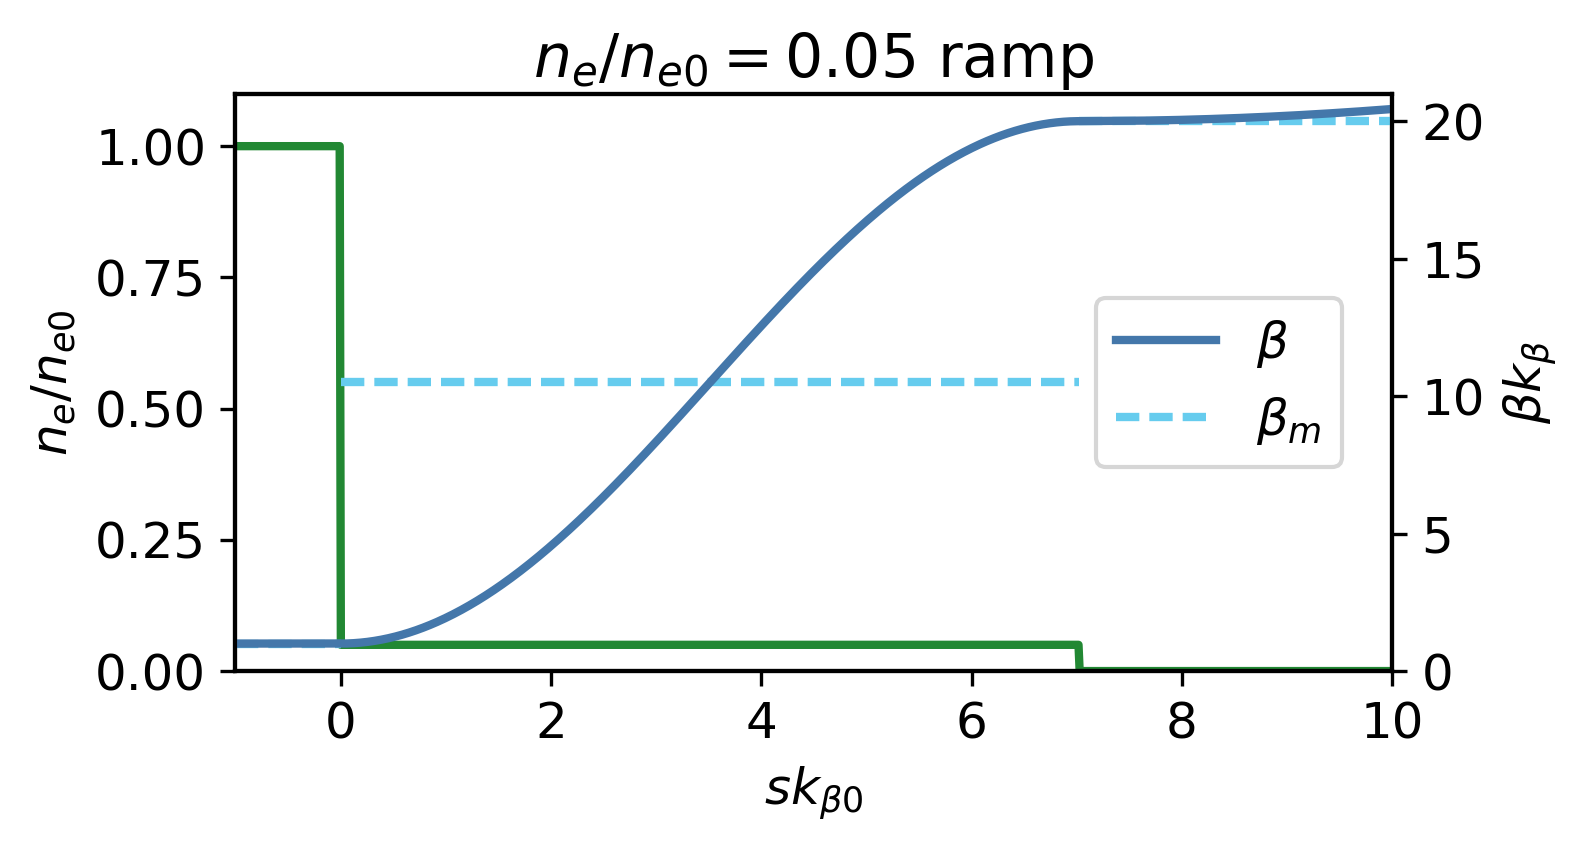

In [6]:
# Lets plot some example square ramps
theta = lambda s: 2*np.sqrt(eta)*s
betaA = lambda s: np.real((B0/2-(a0**2+1)/eta/B0/2+1j*a0/np.sqrt(eta))*np.exp(1j*theta(s))
                          + (B0/2+(a0**2+1)/eta/B0/2))
betaD = lambda s: B0+s**2/B0

N = 1000
B0 = 20
a0 = 0
eta = 0.05
L = np.pi/(2*np.sqrt(eta))
s = np.linspace(-1, 10, N)
sel = [s > L, (s <= L) & (s > 0), s <= 0]
ne = np.piecewise(s, sel, [0, eta, 1.0])
beta = np.zeros(N)
beta[sel[0]] = betaD(s[sel[0]]-L)
beta[sel[1]] = betaA(s[sel[1]]+L)
beta[sel[2]] = 1.0
center = (B0/2+(a0**2+1)/eta/B0/2)

plt.figure(figsize=(5.35, 3), dpi=300)
plt.plot(s, ne, c=green)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlabel(r'$s k_{\beta0}$')
plt.ylim(0, 1.1)
plt.twinx()
plt.plot(s, beta)
plt.plot([L, 10], [B0, B0], 'k--', c=cyan, zorder=1)
plt.plot([0, L], [center, center], 'k--', c=cyan, zorder=1)
plt.plot([-1, 0], [1.0, 1.0], 'k--', c=cyan, zorder=1)
plt.title(r'$n_{e}/n_{e0}=0.05$ ramp')
plt.ylabel(r'$\beta k_\beta$')
plt.ylim(0.0, 21)
plt.xlim(-1, 10)
plt.legend([r'$\beta$', r'$\beta_m$'], bbox_to_anchor=(0.85, 0.5), loc='center')
plt.tight_layout()
plt.savefig(folder+'Box_Ramp.svg')
plt.show()

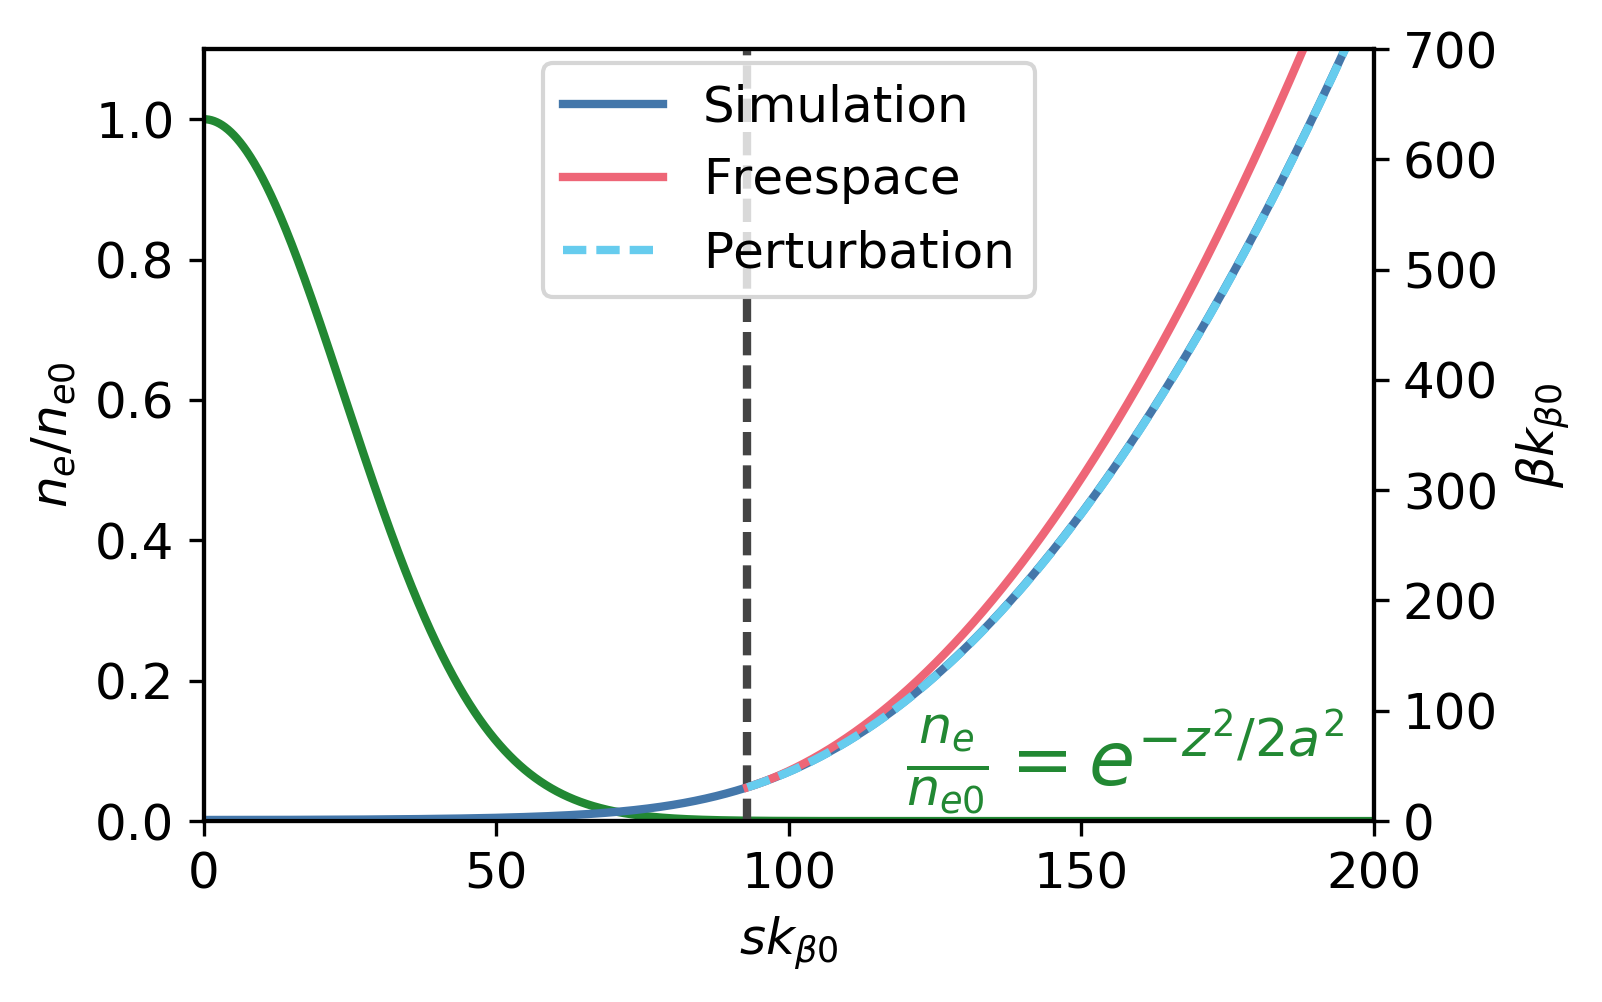

In [7]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z = np.linspace(0, 200, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

cutoff = .85

zTran = z[-np.array(alpha)>cutoff]
fracTran = frac[-np.array(alpha)>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[-np.array(alpha)<=cutoff][-1]
betaTran = np.array(beta)[-np.array(alpha)<=cutoff][-1]
alphaTran = np.array(alpha)[-np.array(alpha)<=cutoff][-1]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
gammaTran = (1+alphaTran**2)/betaTran
betas = 1/(gammaTran+2*(alphaTran*I0[-1]-gammaTran*I1[-1]))
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran


beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)

plt.figure(figsize=(5.5, 3.5), dpi=300)
plt.plot(z, frac, c=green)
plt.text(120, 0.05, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color=green, fontsize=denSize)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
#plt.yscale('log')
plt.ylim(0, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlabel(r'$s k_{\beta0}$')
plt.twinx()
plt.plot(z, beta)
plt.plot(zTran, beta2, )
plt.plot(zTran, betaPer, '--', c=cyan)
plt.plot([tran1, tran1], [-1, 1000], 'k--', c=grey, zorder=0)
plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'Simulation', 'Freespace', 'Perturbation'], bbox_to_anchor=(0.5, 0.83), loc='center')
plt.ylim(0, 700)
plt.xlim(0, 200)
plt.tight_layout()
plt.savefig(folder+'Perturbed_Evolution.svg')
plt.show()

I0 0.0377190946123
I1 0.0749988969319
I2 0.234994198327
9.979058765310151


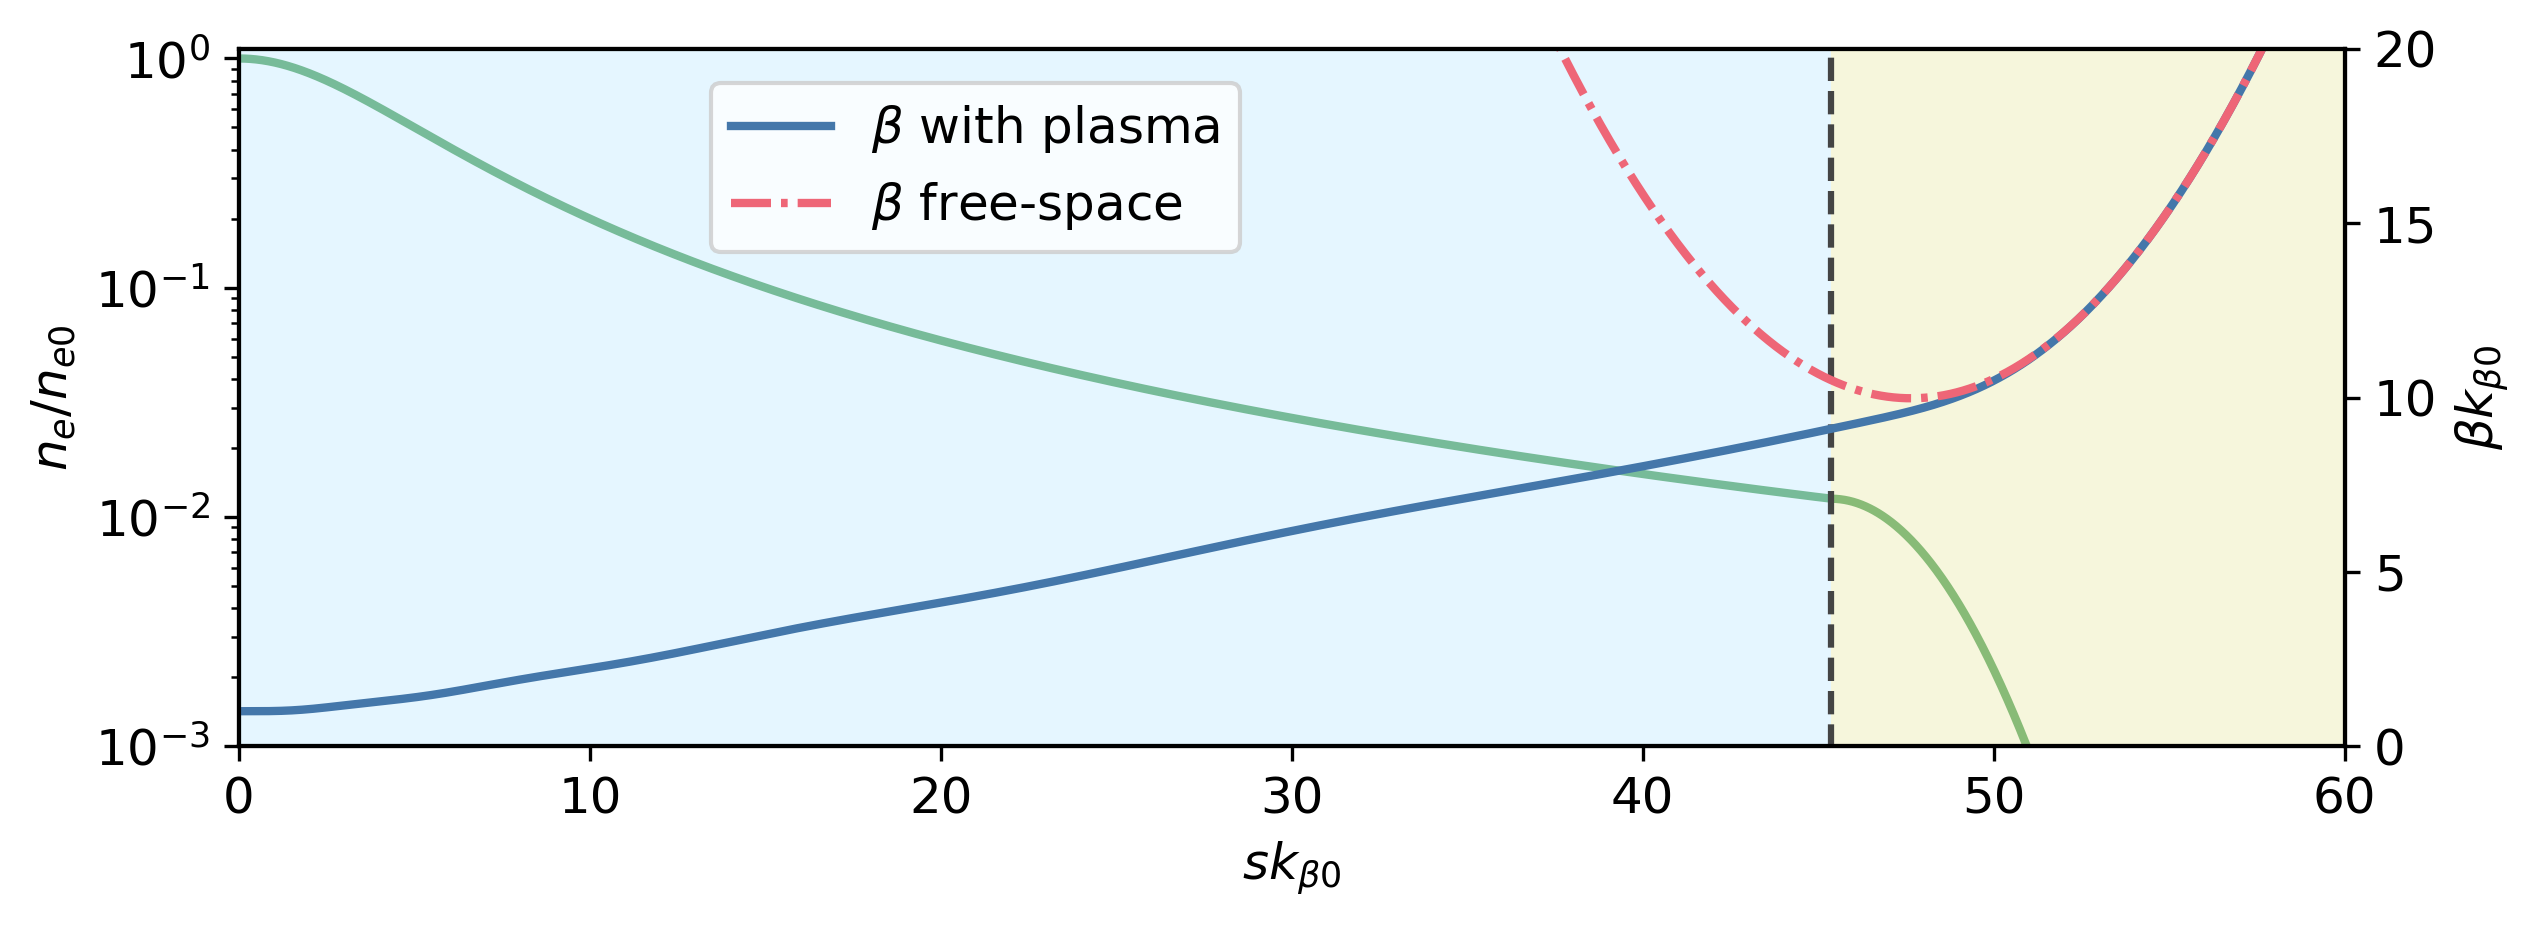

In [8]:
# Designer ramp
N = 5000
beta0 = 1.0
alpha0 = 0.0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.2
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
sel = frac < 0.012
tran = z[sel][0]
ztran = z[sel]
sigma = 2.5
frac[sel] = frac[sel][0]*np.exp(-(ztran - z[sel][0])**2/(2*sigma**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

# Calculate free space propagation
bs = 1/gamma[-1]
ss = alpha[-1]*bs + 100
betaFree = (z-ss)**2/bs+bs

# Calculate perturbed solution
zTran = z[sel]
fracTran = frac[sel]
neTran = np.zeros(len(zTran))
tran1 = z[sel][0]
betaTran = np.array(beta)[sel][1]
alphaTran = np.array(alpha)[sel][1]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
print('I0', I0[-1])
print('I1', I1[-1])
print('I2', I2[-1])
gammaTran = (1+alphaTran**2)/betaTran
betas = 1/(gammaTran+2*(alphaTran*I0[-1]-gammaTran*I1[-1]))
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran

print(bs)

plt.figure(figsize=(8.63, 3.25), dpi=300)
plt.plot(z, frac, c=green)
plt.ylim(1e-3, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlabel(r'$s k_{\beta0}$')
plt.yscale('log')
plt.twinx()
plt.plot(z, beta)
plt.plot(z, betaFree, '-.')
#plt.plot(zTran, betaPer, '--', c=purple)
#plt.plot(z, 1/np.sqrt(frac), c=cyan, zorder=1)

# Plot transition points
plt.plot([tran1, tran1], [-1, 1e4], 'k--', c=grey, zorder=1, linewidth=1.5)

# Regions of the plot
plt.axvspan(0,  tran1, facecolor='#CCEEFF', alpha=0.5, zorder=0)
plt.axvspan(tran1,  140, facecolor='#EEEEBB', alpha=0.5, zorder=0)

plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'$\beta$ with plasma', r'$\beta$ free-space'], bbox_to_anchor=(0.35, 0.83), loc='center')
plt.ylim(0, 20)
plt.xlim(0, 60)
plt.tight_layout()
plt.savefig(folder+'Example_Ramp.svg')
plt.show()

Max theta: 29.973222706


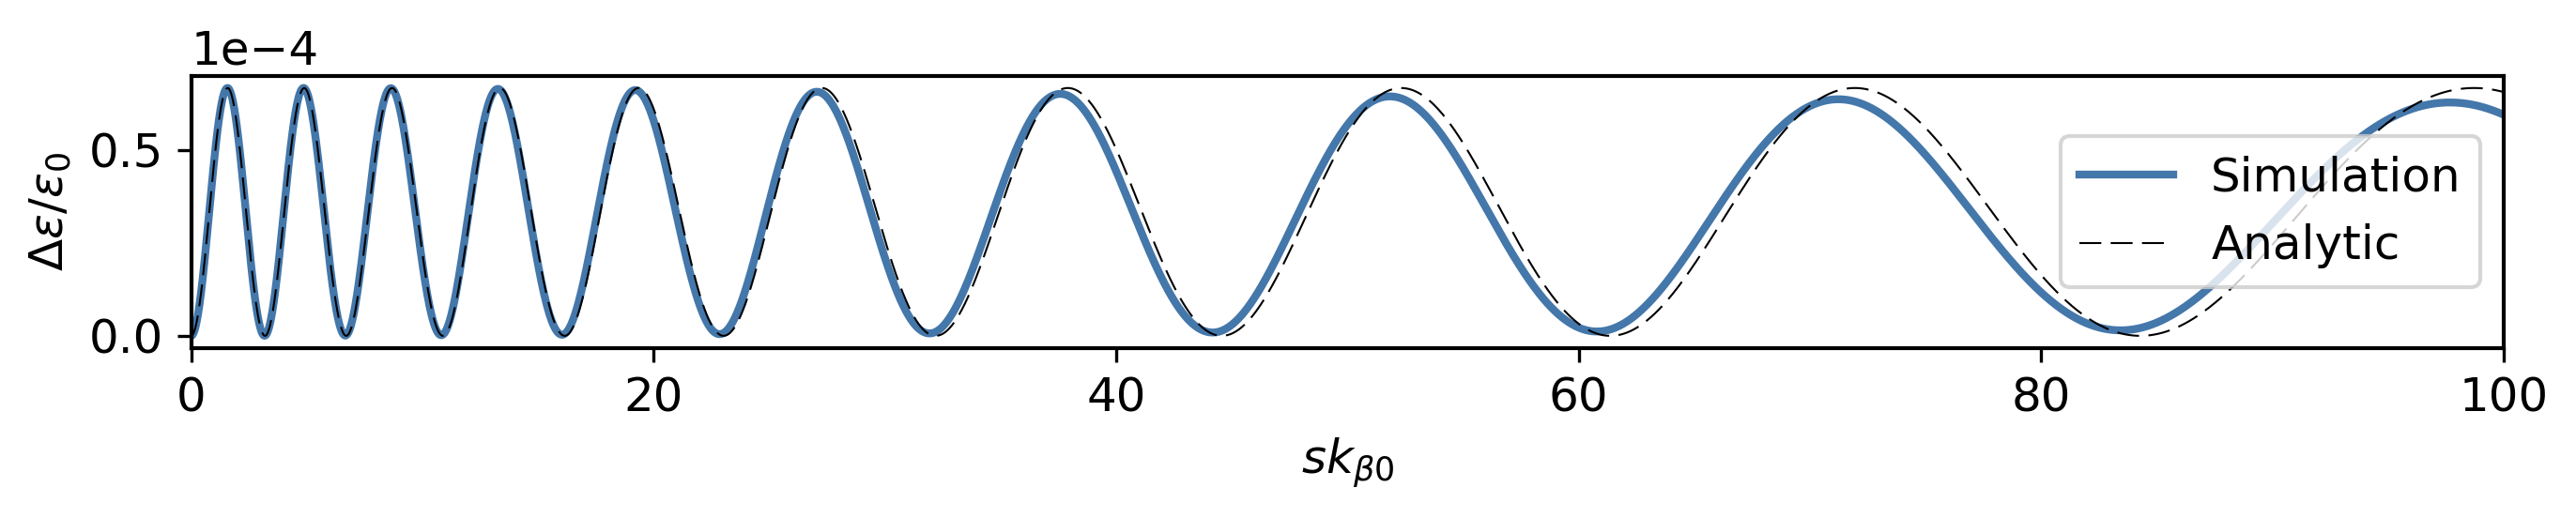

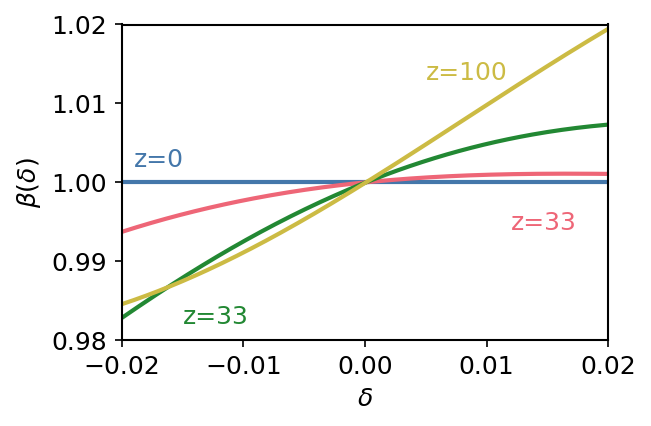

In [9]:
# Look at our realistic ramp
# The matched case in detail
# Check to make sure the matched solution for beta of off energy particles works
N = 5000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.1
delta = 0.02
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*(1+delta), dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*(1-delta), dgdz0, ne0)

betam = 1/np.sqrt(frac)
dz = z[1]-z[0]
theta = (np.cumsum(1/betam)-1/betam[0])*dz
print('Max theta:', theta[-1])
beta1a = 1 + delta/2*(1-np.cos(2*(1-delta/2)*theta))
beta2a = 1 - delta/2*(1-np.cos(2*(1+delta/2)*theta))

M = 200
deltaA = np.linspace(-delta, delta, M)
gb0A = gb0*(1+deltaA)
betaDelta = np.zeros((M, N), dtype='double')
alphaDelta = np.zeros((M, N), dtype='double')
gammaDelta = np.zeros((M, N), dtype='double')
for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0, alpha0, gb0A[i],
                                                                                  dgdz0, ne0)
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)

eps = np.sqrt(betaP*gammaP-alphaP**2)
epsa = (1-np.cos(2*theta))*delta**2/12 + 1


# Plot the emittance growth compared to theory
plt.figure(figsize=(9.15, 2), dpi=300)
plt.plot(z, eps-1)
plt.plot(z, epsa-1, 'k--', linewidth=0.5)
plt.ylabel(r'$\Delta\epsilon/\epsilon_0$')
plt.xlabel(r'$s k_{\beta0}$')
#plt.ylim(-1e-6, 2e-5)
plt.xlim(0, 100)
plt.ticklabel_format(scilimits=(-2, 4))
plt.legend(['Simulation', 'Analytic'])
plt.tight_layout()
plt.savefig(folder+'Simulated_Emittance.svg')
plt.show()

ind = [0, int(N/3), int(2*N/3), N-1]
# Plot beta(delta) as the beam evolves
plt.figure(figsize=(4.5, 3), dpi=150)
for i in range(len(ind)):
    plt.plot(deltaA, betaDelta[:, ind[i]]/betam[ind[i]]-betaDelta[100, ind[i]]/betam[ind[i]]+1, label='%0.1f' %z[ind[i]])
    #plt.plot(deltaA, betam[ind[i]]*(1-np.cos(2*theta[ind[i]]))*deltaA/2+1, 'k--', linewidth=0.5, label='_nolegend_')

# Formatting stuff
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\beta(\delta)$')
plt.xlim(-delta, delta)
plt.ylim(.98, 1.02)
plt.text(0.005, 1.013, 'z=100', color=yellow)
plt.text(-0.019, 1.002, 'z=0', color=blue)
plt.text(0.012, .994, 'z=33', color=red)
plt.text(-0.015, .982, 'z=33', color=green)
plt.tight_layout()
plt.savefig(folder+'Chromatic_Beta.svg')
plt.show()

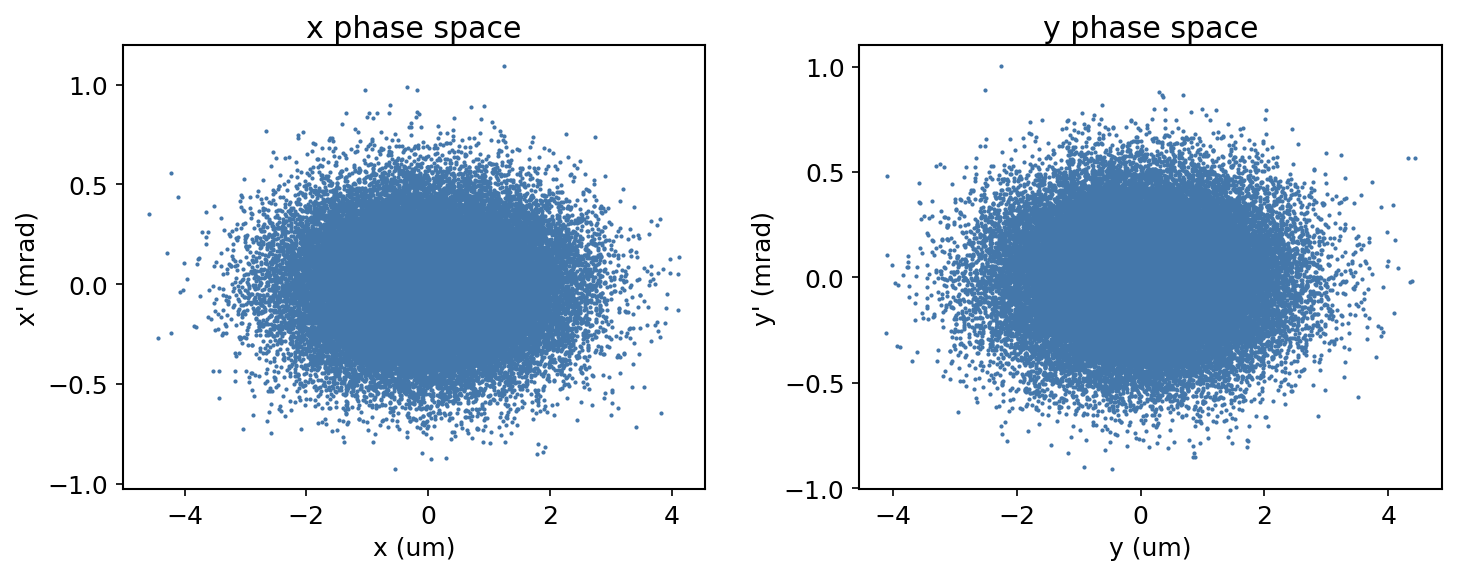

In [10]:
# Run the matched simulation for the animation
import numpy as np
from beam.beams import electronbeam
import matplotlib.pyplot as plt
from beam import interactions
from ionization import ionization
from lens import profile
import beam.calc.electron as ecalc
import scipy.constants as const

# Need to fix path
path = '/media/robert/Data_Storage/Data/Plots/AAC-2018/'
Nz = 600
s = np.linspace(0, 0.2, Nz, dtype='double')
z = s*1e6
ne = 0.5*np.ones(Nz)
# Now we can test my code and see if it is different
kb = 5.95074e4 * np.sqrt(ne[0])/np.sqrt(2*20000)
betaBeam = 1/kb
alphaBeam = 0
electronParams = {
    'name' : 'AAC-2018Matched',
    'path' : path,
    'load' : False,
    'N' : 50000,
    'gamma' : 20000,
    'emittance' : 5.0e-6,
    'betax' : betaBeam,
    'betay' : betaBeam,
    'alphax' : alphaBeam,
    'alphay' : alphaBeam,
    'sigmaz' : 5e-6,
    'dE' : 0.1
}

beam = electronbeam.GaussianElectronBeam(electronParams)
#beam = electronbeam.ElectronBeam(electronParams)
beam.plot_current_phase()

class plasmaCls():
    def __init__(self):
        """ Empy init function """
    def get_ne(self, z):
        return 0.5*np.ones(Nz)
    def dgammadz(self, ne):
        return 0.0
    
plasmaDen = plasmaCls()
dumpPer = 1
interactions.electron_plasma(beam, plasmaDen, z, dumpPer, 1)
beta, alpha, gamma, gb = ecalc.cs_propagation(z*1e-6, ne, betaBeam, alphaBeam, 20000, 0, 0.5)

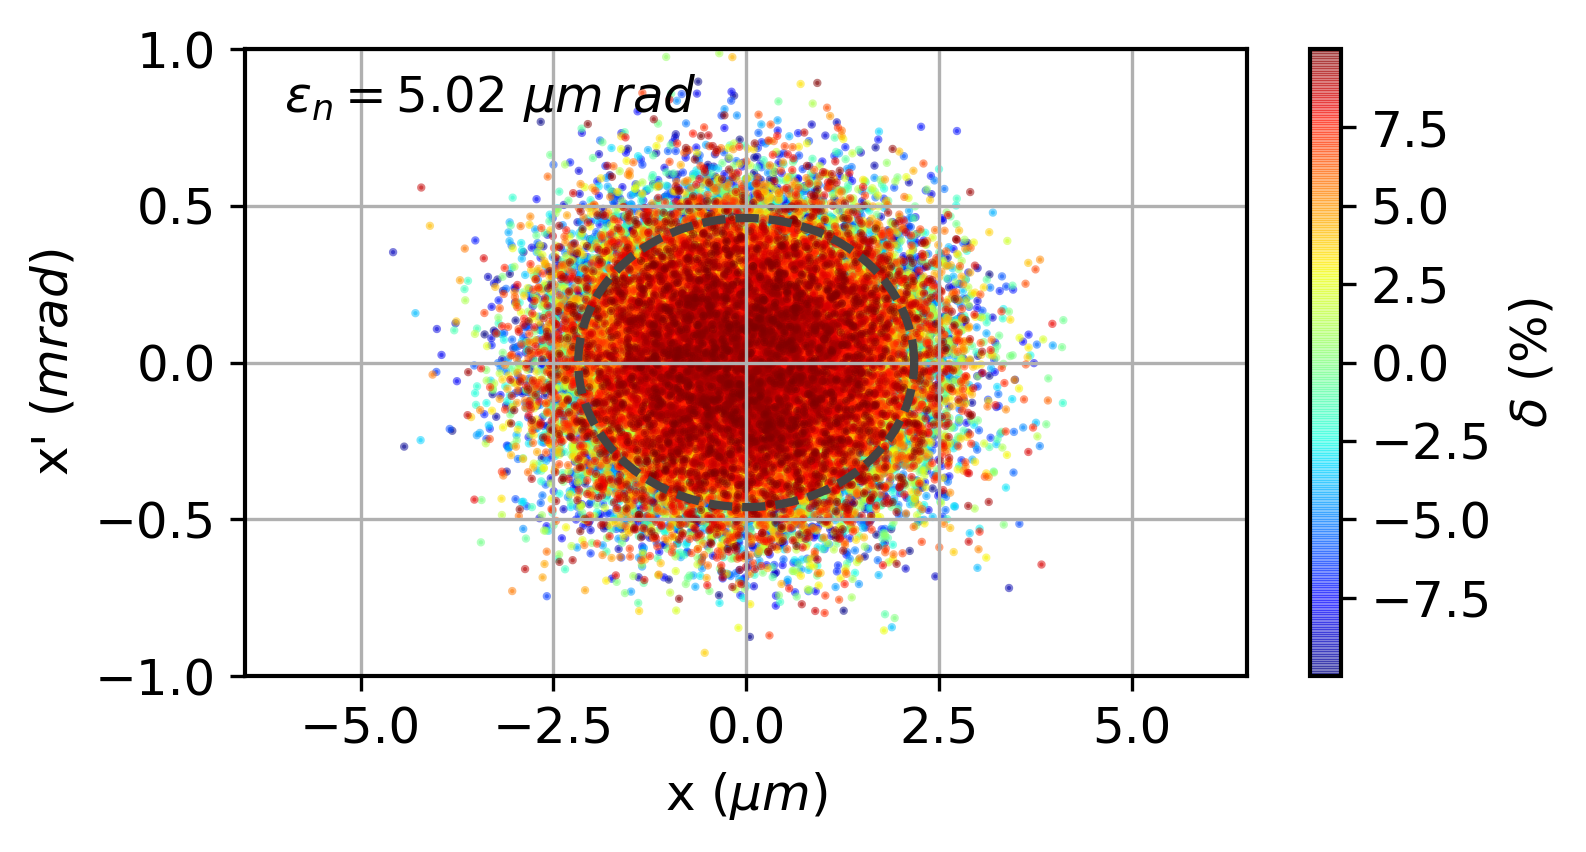

In [11]:
# This needs to be before animation is imported
plt.rcParams['animation.ffmpeg_path'] = '/home/robert/anaconda3/envs/CU-PWFA/bin/ffmpeg'
import matplotlib.animation as animation

for i in range(0, Nz):
    ptcls = beam.load_ptcls(i)[0]

ind = 0
# Grab the dump we are interested in
def get_data(ind):
    ptcls, z = beam.load_ptcls(ind)
    ptx = ptcls[:, 0]*1e6
    ptxp = ptcls[:, 1]*1e3
    gamma = ptcls[:, 5]
    sort = np.argsort(gamma)
    ptx = ptx[sort]
    ptxp = ptxp[sort]
    gamma = gamma[sort]
    delta = (gamma/20000 - 1)*100
    return ptx, ptxp, delta

def calc_em(x, xp):
    dx = x - np.average(x)
    dxp = xp - np.average(xp)
    # Calculate the RMS sizes and the correlation
    sigmax2 = np.average(dx**2)
    sigmaxp2 = np.average(dxp**2)
    sigmaxxp = np.average(dx*dxp)
    ex = np.sqrt(sigmax2*sigmaxp2 - sigmaxxp**2)
    beta = sigmax2/ex
    alpha = -sigmaxxp/ex
    return beta, alpha, ex
    
# Get the first piece of data
ptx, ptxp, gamma = get_data(ind)
beta, alpha, ex = calc_em(ptx, ptxp)

# Create the emittance ellipse plot
t = np.linspace(0, 2*np.pi, 300)

# Create the plot
fig = plt.figure(figsize=(5.45, 3), dpi=300)
sct = plt.scatter(ptx, ptxp, c=gamma, cmap=plt.cm.get_cmap('jet'), 
                      s=1.0, alpha=0.5)
em = plt.plot(2*np.sqrt(beta*ex)*np.cos(t), 2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t)), 'k--', c=grey)[0]
emText = plt.text(-6, .8, r'$\epsilon_n=$%0.2f $\mu m\,rad$' % (ex*20))
elements = [sct, em, emText]

# Formatting stuff
cb = plt.colorbar()
cb.set_label(r'$\delta$ (%)')
plt.xlabel(r'x ($\mu m$)')
plt.ylabel(r"x' ($mrad$)")
plt.xlim(-6.5, 6.5)
plt.ylim(-1, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Update the scatter plot data
i = ind+1;
def updatefig(*args):
    global i
    ptx, ptxp, gamma = get_data(i)
    beta, alpha, ex = calc_em(ptx, ptxp)
    sct.set_offsets(np.stack((ptx, ptxp), axis=-1))
    sct.set_array(gamma)
    em.set_data(2*np.sqrt(beta*ex)*np.cos(t), 2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t)))
    emText.set_text(r'$\epsilon_n=$%0.2f $\mu m\,rad$' % (ex*20))
    i += 1
    # If we run over, loop
    if i == Nz+1:
        i = ind
    if i % 30 == 0:
        print("Frame", i, "completed")
    return elements

#ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=Nz-ind-3)
#ani.save('MatchedBeam.mp4', fps=30)

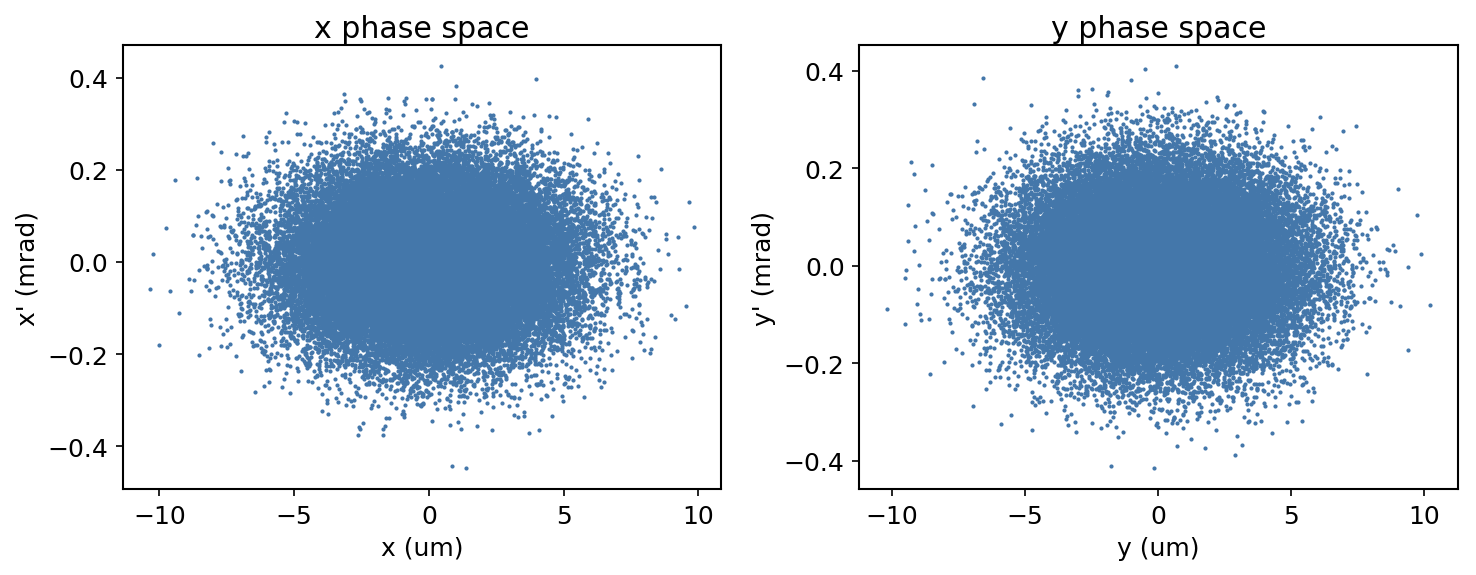

In [12]:
# Run the unmatched simulation for the animation

# Need to fix path
path = '/media/robert/Data_Storage/Data/Plots/AAC-2018/'
# Now we can test my code and see if it is different
betaBeam = 25e-3
alphaBeam = 0
electronParams = {
    'name' : 'AAC-2018UnMatched',
    'path' : path,
    'load' : False,
    'N' : 50000,
    'gamma' : 20000,
    'emittance' : 5.0e-6,
    'betax' : betaBeam,
    'betay' : betaBeam,
    'alphax' : alphaBeam,
    'alphay' : alphaBeam,
    'sigmaz' : 5e-6,
    'dE' : 0.1
}

beam = electronbeam.GaussianElectronBeam(electronParams)
#beam = electronbeam.ElectronBeam(electronParams)
beam.plot_current_phase()
    
plasmaDen = plasmaCls()
dumpPer = 1
interactions.electron_plasma(beam, plasmaDen, z, dumpPer, 1)
beta, alpha, gamma, gb = ecalc.cs_propagation(z*1e-6, ne, betaBeam, alphaBeam, 20000, 0, 0.5)

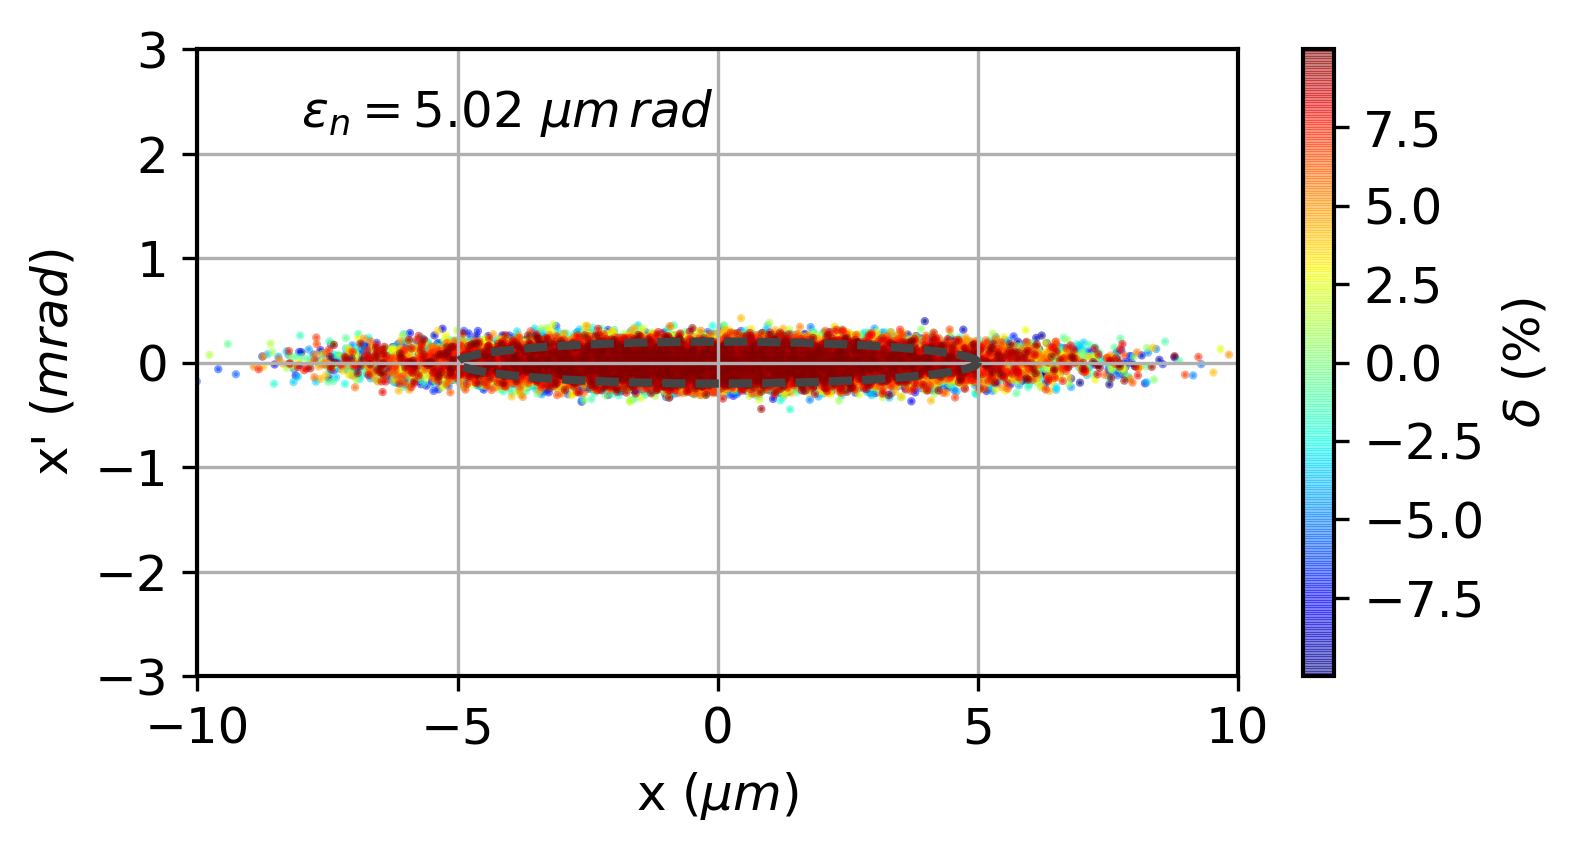

In [13]:
for i in range(0, Nz):
    ptcls = beam.load_ptcls(i)[0]

ind = 0  
# Get the first piece of data
ptx, ptxp, gamma = get_data(ind)
beta, alpha, ex = calc_em(ptx, ptxp)

# Create the emittance ellipse plot
t = np.linspace(0, 2*np.pi, 300)

# Create the plot
fig = plt.figure(figsize=(5.45, 3), dpi=300)
sct = plt.scatter(ptx, ptxp, c=gamma, cmap=plt.cm.get_cmap('jet'), 
                      s=1.0, alpha=0.5)
em = plt.plot(2*np.sqrt(beta*ex)*np.cos(t), 2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t)), 'k--', c=grey)[0]
emText = plt.text(-8, 2.25, r'$\epsilon_n=$%0.2f $\mu m\,rad$' % (ex*20))
elements = [sct, em, emText]

# Formatting stuff
cb = plt.colorbar()
cb.set_label(r'$\delta$ (%)')
plt.xlabel(r'x ($\mu m$)')
plt.ylabel(r"x' ($mrad$)")
plt.xlim(-10, 10)
plt.ylim(-3, 3)
plt.grid(True)
plt.tight_layout()
plt.show()

# Update the scatter plot data
i = ind+1;

#ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=Nz-ind-3)
#ani.save('UnMatchedBeam.mp4', fps=30)

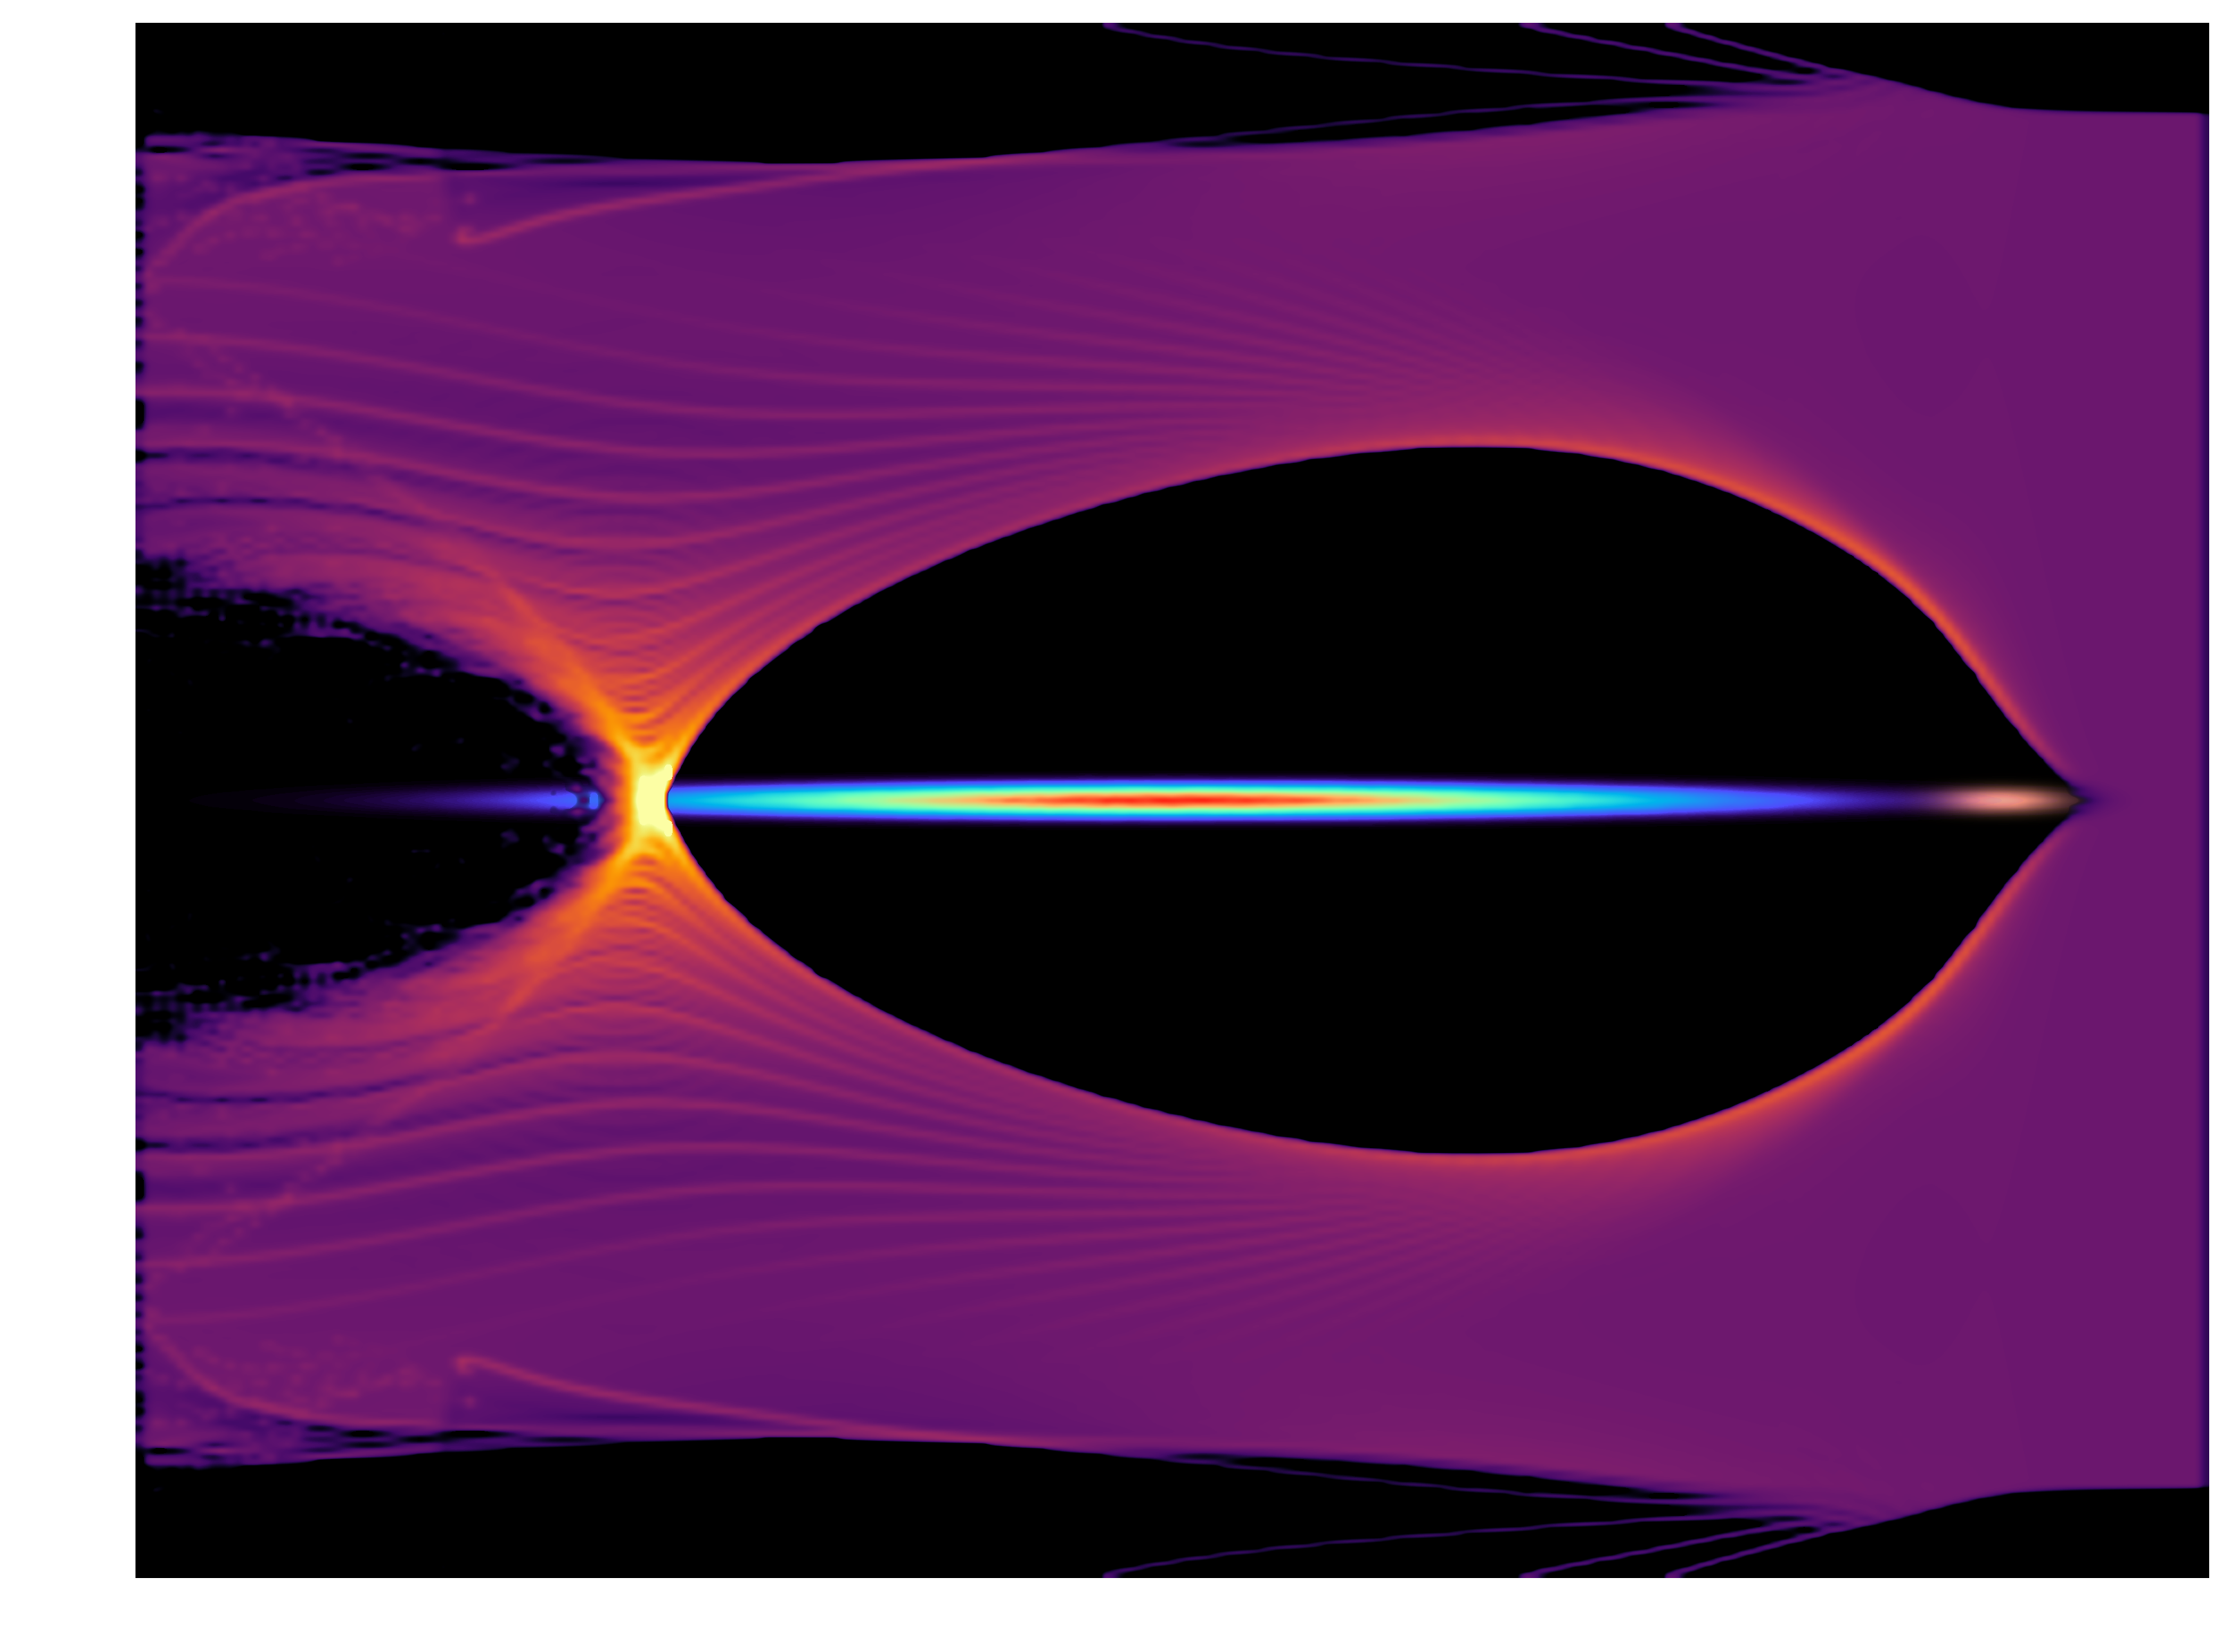

In [14]:
# Title slide image
import os
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib.colors as colors
e = const.physical_constants['elementary charge'][0]

path = '/media/robert/Data_Storage/VSim/Matched-Accelerating-Gradient/3DWitness_Beam_Distance/5e16PlasmaDensity/100um/'
simName = 'AccelGradient'

# Load in plasma density
rho, rhoAttrs = load.load_field(path, simName, 'rhoPlasma')
Nx, Ny, Nz = analyze.get_shape(rho[5])
rhoXY = -np.transpose(rho[5][:, :, int(Nz+1)/2, 0]/e/1e6)+2 #+2 makes it greater than 0 for log scale
x = np.linspace(0, 250, Nx)
y = np.linspace(0, 250, Ny)

#Load in drive beam density
rho, rhoAttrs = load.load_field(path, simName, 'rhoDrive')
Nx, Ny, Nz = analyze.get_shape(rho[5])
rhoBXY = -np.transpose(rho[5][:, :, int(Nz+1)/2, 0]/e/1e6)

#Load in witness beam density
rho, rhoAttrs = load.load_field(path, simName, 'rhoWitness')
Nx, Ny, Nz = analyze.get_shape(rho[5])
rhoWXY = -np.transpose(rho[5][:, :, int(Nz+1)/2, 0]/e/1e6)

def alpha_colormap(cmap, cutoff, flip=True):
    N = cmap.N
    cmapt = cmap(np.arange(N))
    alpha = np.ones(N)
    if flip:
        temp = alpha[:int(cutoff*N)]
        M = len(temp)
        alpha[:int(cutoff*N)] = np.linspace(0, 1, M)
    else:
        alpha[int((1-cutoff)*N):] = 0.0
    cmapt[:, -1] = alpha
    cmapt = colors.ListedColormap(cmapt)
    return cmapt

# Plot the plasma density
fig = plt.figure(figsize=(10, 7.5), dpi=300, frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

# Plot the drive beam
ax.imshow(rhoBXY, interpolation='gaussian', extent=[-125, 125, -125, 125], cmap='copper')

# Plot the witness beam
#cmapW = alpha_colormap(plt.cm.get_cmap('nipy_spectral'), 0.1, True)
cmapW = alpha_colormap(plt.cm.get_cmap('rainbow'), 0.1, True)
ax.imshow(rhoWXY, interpolation='gaussian', extent=[-125, 125, -125, 125], cmap=cmapW)

# Plot the plasma density
cmapP = alpha_colormap(plt.cm.get_cmap('inferno'), 0.2, True)
ax.imshow(rhoXY, interpolation='gaussian', aspect='auto', extent=[-125, 125, -125, 125],
           norm=colors.LogNorm(vmin=1e16, vmax=2e18), cmap=cmapP)

plt.savefig(folder+'Title_Wake.png')
plt.show()

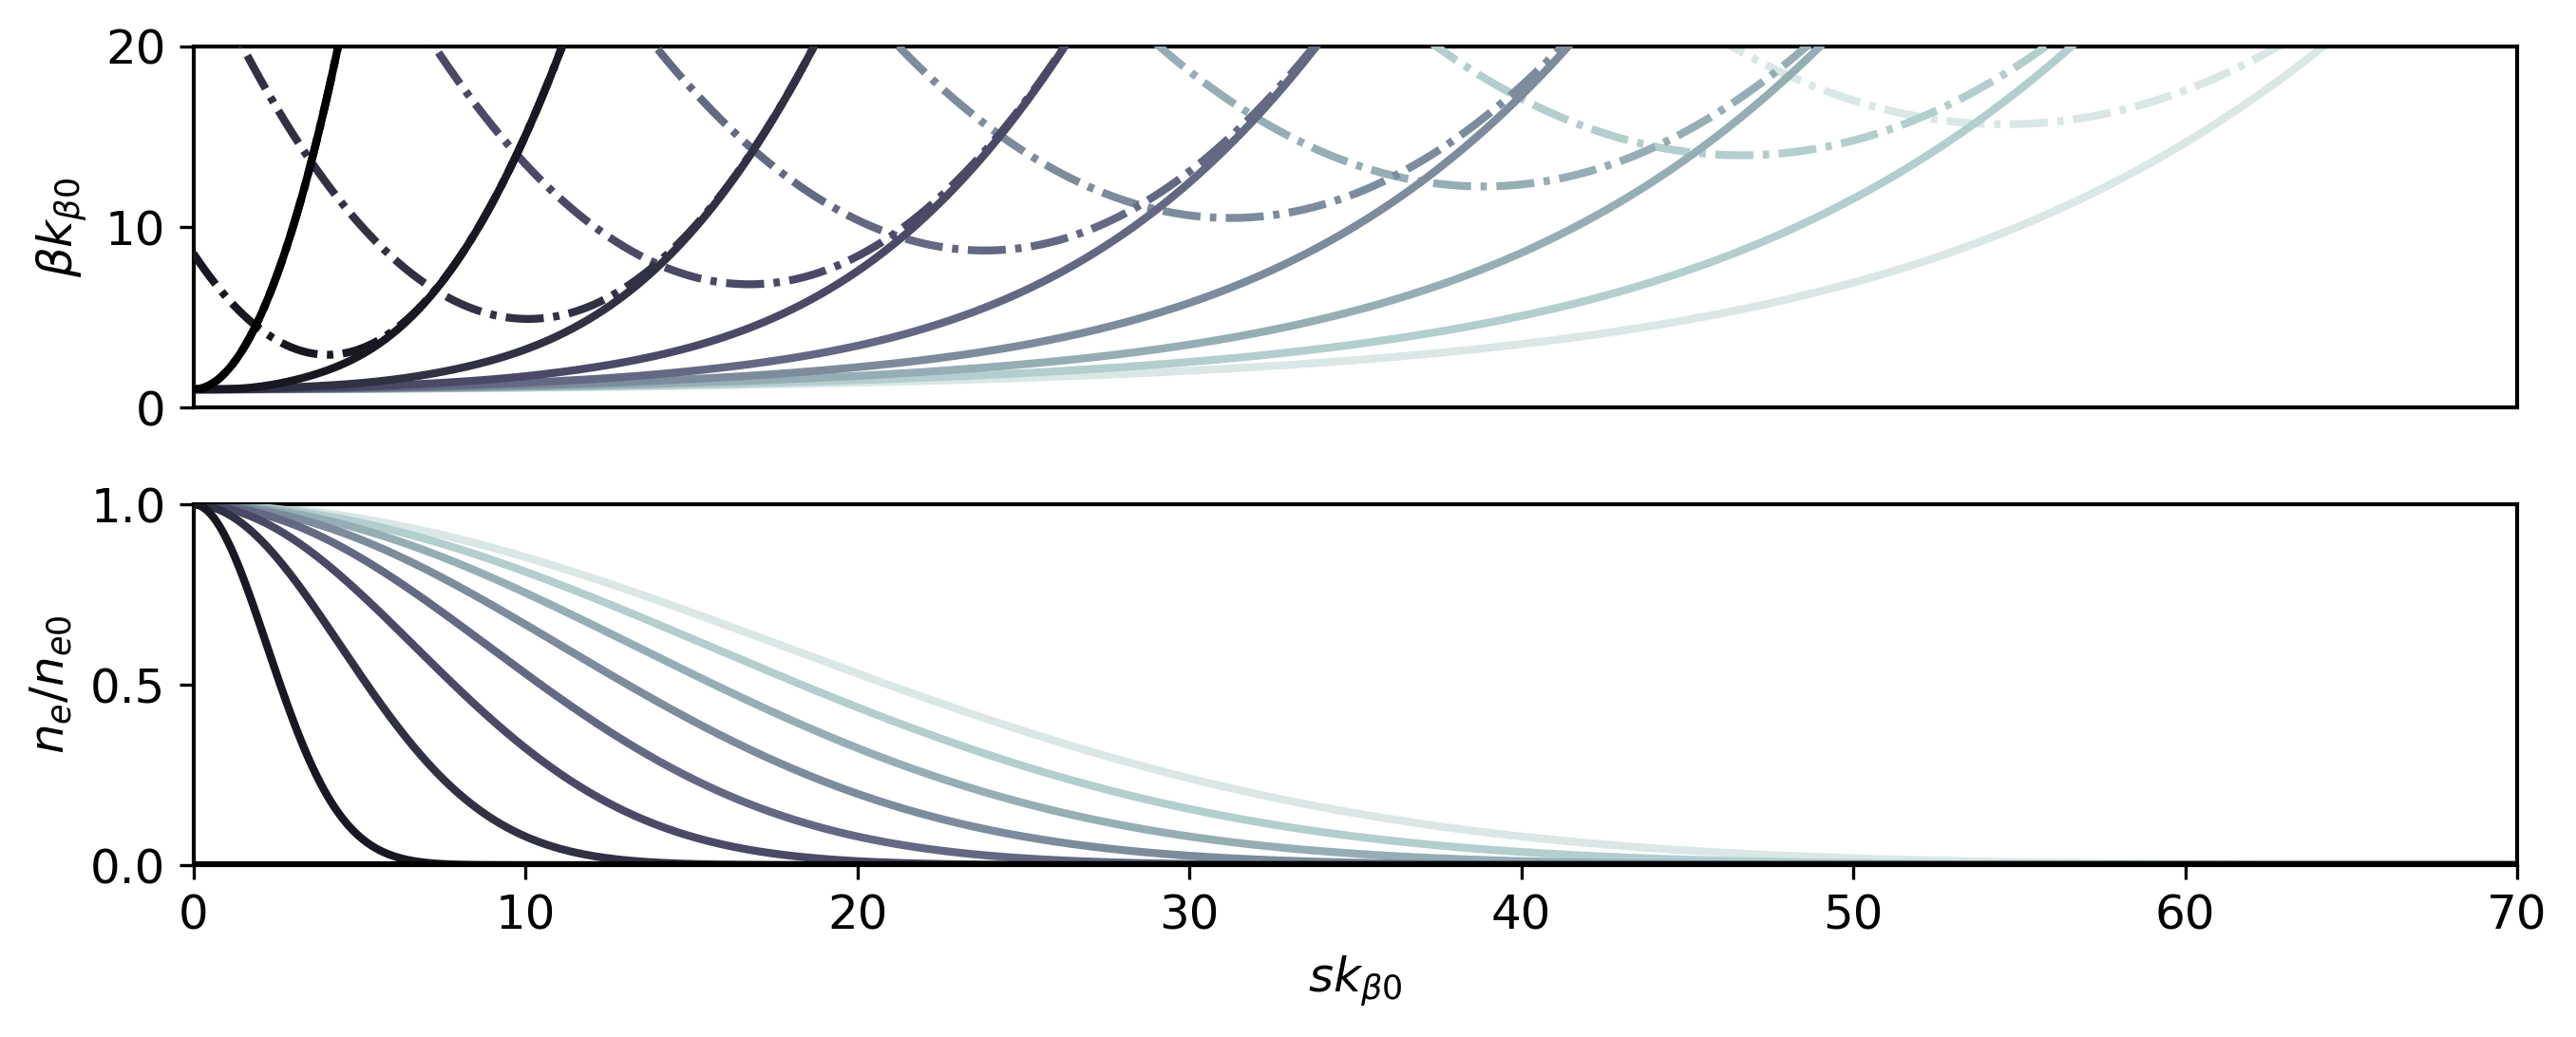

In [15]:
# Plot of waist scaling with beam
H = 10
a = np.linspace(0, 20, H)
zmax = 100
N = 5000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
z = np.linspace(0, zmax, N)

# Create the figure
plt.figure(figsize=(9.2, 3.8), dpi=300)
gs = gridspec.GridSpec(2, 1)
ax = plt.subplot(gs[0, 0])
color = [plt.cm.bone(i) for i in np.linspace(0, 1, H)]
for i in range(H):
    if a[i]==0:
        frac = z*0.0
    else:
        frac = np.exp(-z**2/(2*a[i]**2))
    ne = frac*ne0
    beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

    # Calculate the free space propagation
    bs = 1/gamma[-1]
    ss = alpha[-1]*bs+zmax
    betaFree = (z-ss)**2/bs+bs

    # Plotting
    #------------------------------------------------------------------------------------
    # Plot beam evolution 
    plt.plot(z, beta, c=color[i], zorder=H-i)
    plt.plot(z, betaFree, '-.', c=color[i], zorder=H-i)
    
plt.ylabel(r'$\beta k_{\beta0}$')
#plt.legend([r'$\beta$ with plasma', r'$\beta$ free-space', r'Transition'], loc=1)
plt.ylim(0, 20)
plt.xlim(0, 70)
ax.get_xaxis().set_visible(False)

# Plot plasma densities
plt.subplot(gs[1, 0])
for i in range(H):
    if a[i]==0:
        frac = z*0.0
    else:
        frac = np.exp(-z**2/(2*a[i]**2))
    plt.plot(z, frac, c=color[i], zorder=H-i)
plt.ylim(0, 1)
plt.xlim(0, 70)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlabel(r'$s k_{\beta0}$')
    
plt.tight_layout()
plt.savefig(folder+'Length_Scaling.svg')
plt.show()

45.3690738148


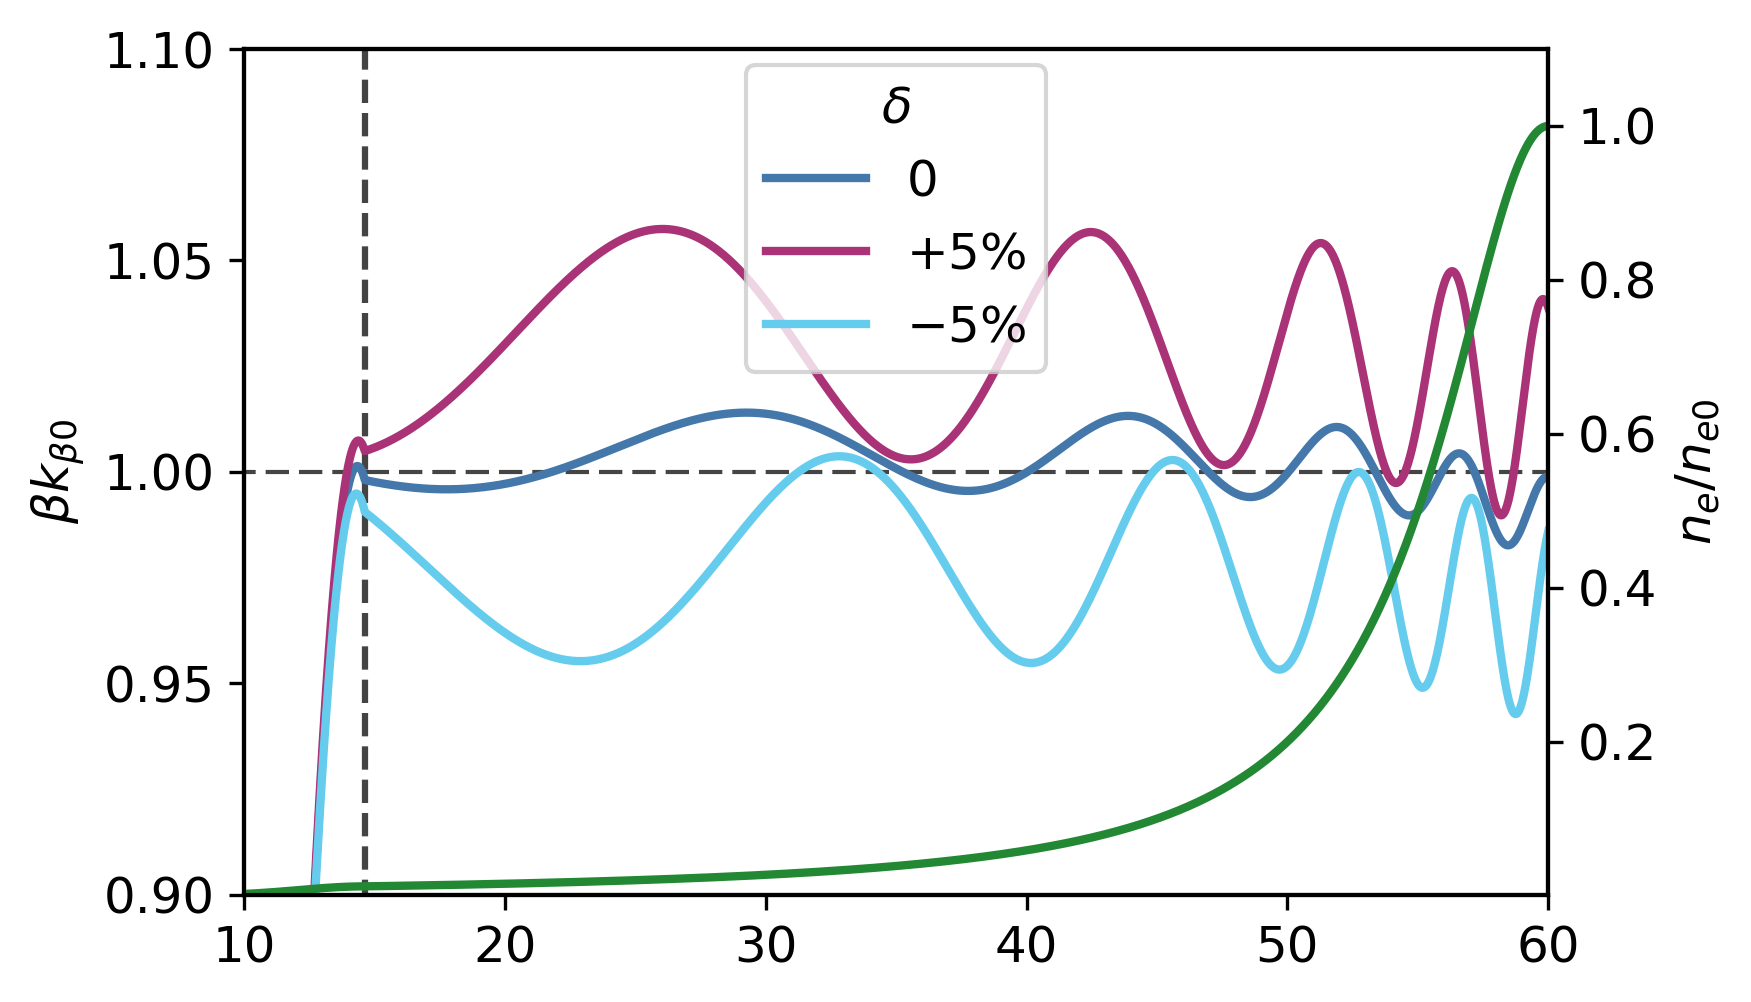

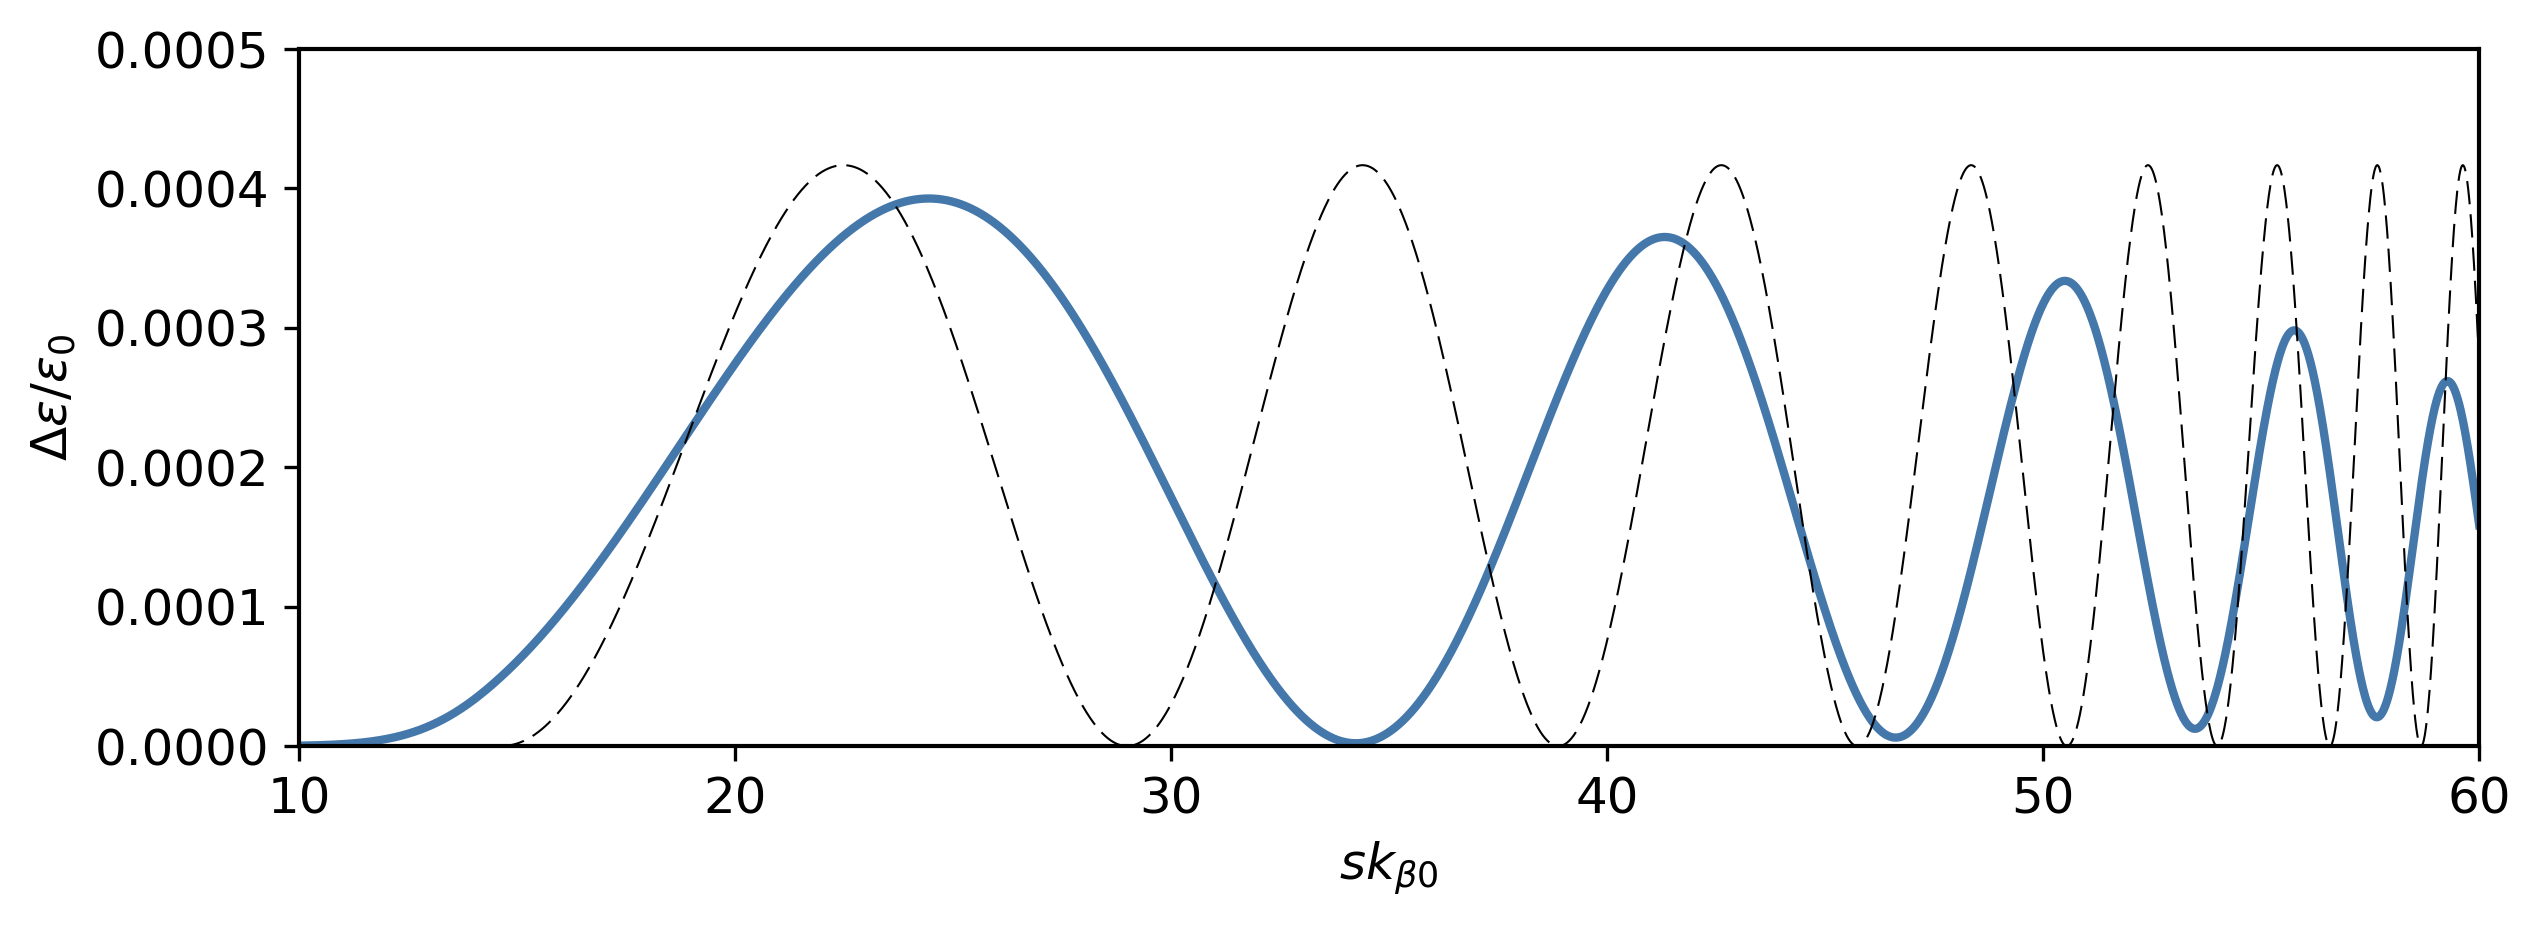

In [16]:
# Chromaticity in the designer ramp
# First propagate the ramp forward so we know what to start at
N = 5000
beta0 = 1.0
alpha0 = 0.0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.2
z = np.linspace(0, 60, N)
frac = 1/(1+(a*z)**2)
sel = frac < 0.012
tran = z[sel][0]
print(tran)
ztran = z[sel]
sigma = 2.5
frac[sel] = frac[sel][0]*np.exp(-(ztran - z[sel][0])**2/(2*sigma**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

# Forward propagate through an up-ramp
ne = np.flip(ne, 0)
beta0 = beta[-1]
alpha0 = -alpha[-1]
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*1.05, dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*0.95, dgdz0, ne0)

frac = np.flip(frac, 0)
betam = 1/np.sqrt(frac)

plt.figure(figsize=(6, 3.5), dpi=300)
plt.plot(z, np.array(beta)/betam)
plt.plot(z, np.array(beta1)/betam, c=purple)
plt.plot(z, np.array(betan1)/betam, c=cyan)

tran = 60-tran
# Plot transition points
plt.plot([tran, tran], [-1, 1e4], 'k--', c=grey, zorder=1, linewidth=1.5)
plt.plot([0, 60], [1.0, 1.0], 'k--', c=grey, zorder=0, linewidth=1)

# Regions of the plot
#plt.axvspan(0,  tran1, facecolor='#CCEEFF', alpha=0.5, zorder=0)
#plt.axvspan(tran1,  140, facecolor='#EEEEBB', alpha=0.5, zorder=0)

plt.ylabel(r'$\beta k_{\beta0}$')
plt.legend([r'$0$', r'$+5\%$', r'$-5\%$'], title=r'$\delta$',
           bbox_to_anchor=(0.5, 0.8), loc='center')
plt.ylim(0.9, 1.1)
plt.twinx()
plt.plot(z, frac, c=green, zorder=0)
plt.ylim(1e-3, 1.1)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlabel(r'$s k_{\beta0}$')
#plt.yscale('log')
plt.xlim(10, 60)

plt.tight_layout()
plt.savefig(folder+'Chromatic_Example_Ramp.svg')
plt.show()

# We'll just leave this here as a reference that the chromaticity in the perturbative section
# Decreases the amplitude of the emittance in the adiabatic section
# Calculate the emittance growth
M = 500
delta = np.linspace(-0.05, 0.05, M)
gb0A = 20000*(1+delta)
betaDelta = np.zeros((M, N), dtype='double')
alphaDelta = np.zeros((M, N), dtype='double')
gammaDelta = np.zeros((M, N), dtype='double')
sel = frac >= 0.012
zAdi = z[sel]
theta = (np.cumsum(1/betam[sel])-1/betam[sel][0])*dz
for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0, alpha0, gb0A[i],
                                                                                  dgdz0, ne0)
    
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)
eps = np.sqrt(betaP*gammaP-alphaP**2)
avgeps = np.average(eps)

epsa = (1-np.cos(2*theta))*0.05**2/12 + 1

plt.figure(figsize=(8.63, 3.25), dpi=300)
plt.plot(z, eps-1, label='_nolegend_')
plt.plot(zAdi, epsa-1, 'k--', linewidth=0.5)
plt.xlabel(r'$s k_{\beta0}$')
plt.ylabel(r'$\Delta\epsilon/\epsilon_0$')
#plt.legend(bbox_to_anchor=(0.85, 0.8), loc='center')
plt.xlim(10, 60)
plt.ylim(0, 0.0005)

plt.tight_layout()
plt.show()

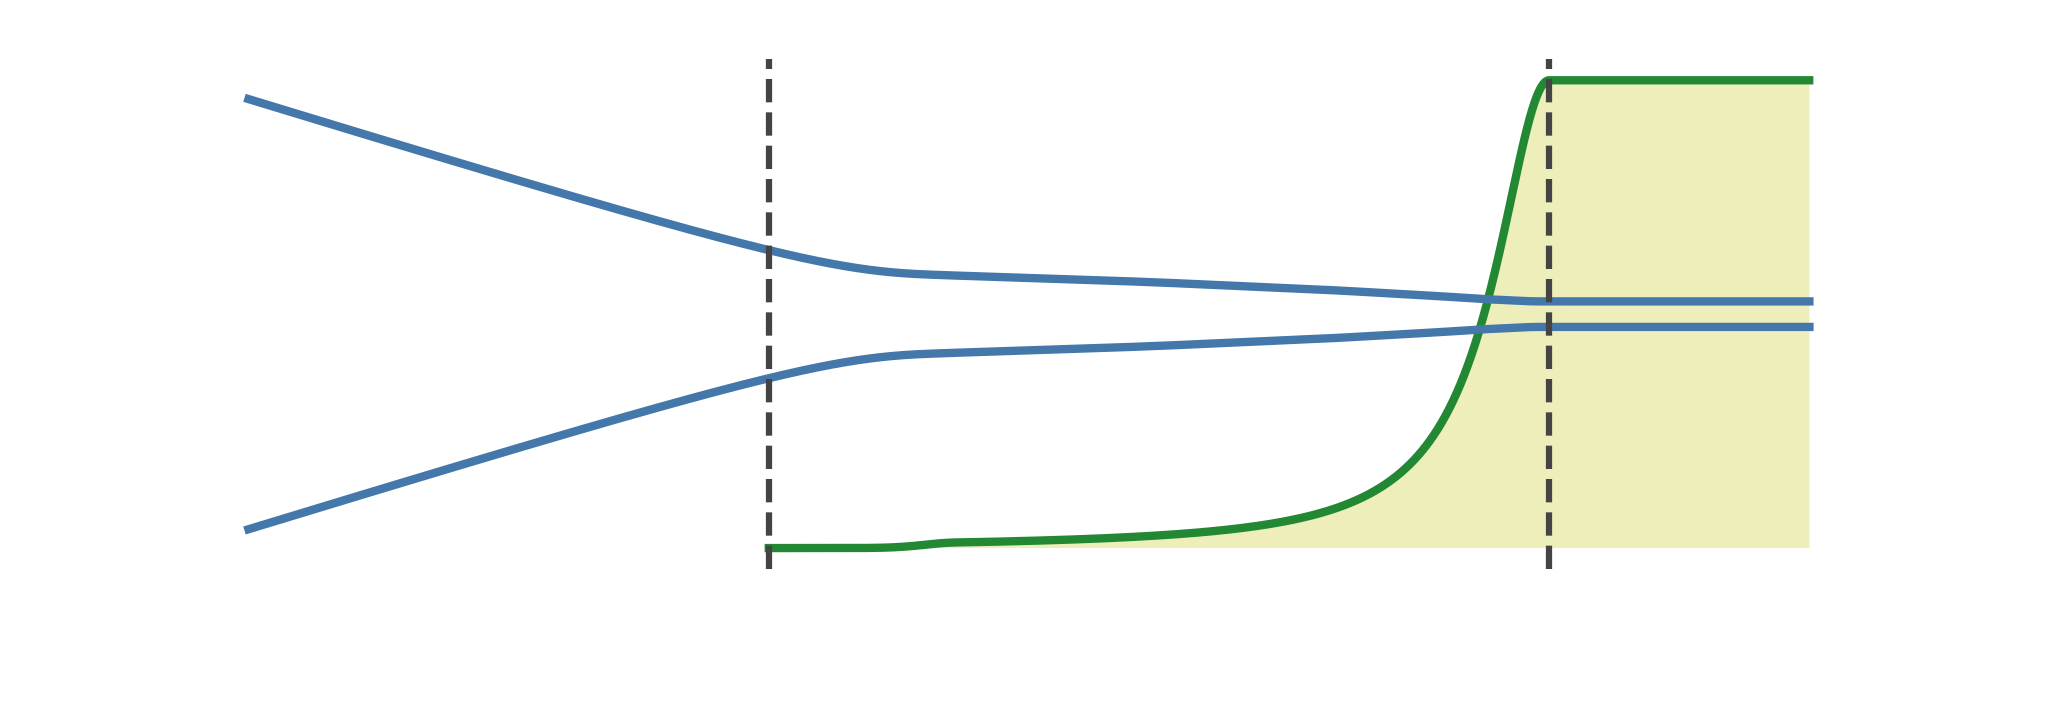

In [17]:
# Now we need the ramp shape plot to set up the entire thing
N = 5000
beta0 = 1.0
alpha0 = 0.0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.2
z = np.linspace(-20, 100, N)
frac = 1/(1+(a*z)**2)
# Create the perturbative part
sel = frac < 0.012
tran = z[sel][0]
ztran = z[sel]
sigma = 2.5
frac[sel] = frac[sel][0]*np.exp(-(ztran - z[sel][0])**2/(2*sigma**2))
# Create the flattop region
sel = z <= 0
frac[sel] = 1.0
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

# From this we need the beam envelope
r = np.sqrt(beta)

sel = z < 60
plt.figure(figsize=(7, 2.5), dpi=300, frameon=False)
plt.plot(z[sel]+40, np.flip(frac[sel], 0), c=green, zorder=1)
plt.fill_between(z, 0.0, np.flip(frac, 0), where=frac>=0.0, facecolor='#EEEEBB', zorder=0)
plt.ylim(-0.1, 1.1)
plt.axis('off')

plt.twinx()
plt.plot(z, np.flip(r, 0))
plt.plot(z, -np.flip(r, 0), c=blue)
plt.plot([20, 20], [-20, 20], 'k--', c=grey, linewidth=1.5)
plt.plot([80, 80], [-20, 20], 'k--', c=grey, linewidth=1.5)
plt.axis('off')
plt.tight_layout()
plt.savefig(folder+'Ramp_Setup.svg')
plt.show()